### Introduction

##### Tracking customer spending time on e-commerce websites based on various factors.

### Load Necessary Packages

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import calplot
import warnings
warnings.filterwarnings('ignore')

### Import the Train and Test Dataset

In [2]:
train = pd.read_csv("../ParticipantData_BTPC/Train.csv")
test = pd.read_csv("../ParticipantData_BTPC/Test.csv")

### Let's view the structure of the train and test dataset

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5429 entries, 0 to 5428
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   session_id      5429 non-null   object 
 1   session_number  5429 non-null   int64  
 2   client_agent    5269 non-null   object 
 3   device_details  5429 non-null   object 
 4   date            5429 non-null   object 
 5   purchased       5429 non-null   int64  
 6   added_in_cart   5429 non-null   int64  
 7   checked_out     5429 non-null   int64  
 8   time_spent      5429 non-null   float64
dtypes: float64(1), int64(4), object(4)
memory usage: 297.0+ KB


In [4]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2327 entries, 0 to 2326
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   session_id      2327 non-null   object
 1   session_number  2327 non-null   int64 
 2   client_agent    2268 non-null   object
 3   device_details  2327 non-null   object
 4   date            2327 non-null   object
 5   purchased       2327 non-null   int64 
 6   added_in_cart   2327 non-null   int64 
 7   checked_out     2327 non-null   int64 
dtypes: int64(4), object(4)
memory usage: 109.1+ KB


### Let's view the data sample from train and test dataset

In [5]:
train.head()

,session_id,session_number,client_agent,device_details,date,purchased,added_in_cart,checked_out,time_spent
0,57f879e70d3c5fc2a98102d64c9fd84e,715,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,Desktop - Chrome,2020-01-22,1,0,0,236.886
1,a5442b0c7c33d0a811e7661e556b2de8,55,Product/8.0 iPhone/8.1.3,iPhone - iOS,2020-02-27,1,0,0,1277.455
2,305cb1486ed8610c00b37007926cb2c4,11,Mozilla/5.0 (iPhone; CPU iPhone OS 7_1_2 like ...,iPhone - MobileWeb,2019-08-01,0,0,0,21.704
3,f2c1ecc9993f0071df91ba178450498c,2794,Mozilla/5.0 (compatible; MSIE 9.0; Windows NT ...,Desktop - IE,2019-12-30,0,1,0,455.201
4,e460830ae295e55d2216ebdc761ab9a6,3674,Mozilla/5.0 (iPhone; CPU iPhone OS 7_1_1 like ...,iPhone - Web,2019-09-10,0,0,0,1164.877


In [6]:
test.head()

,session_id,session_number,client_agent,device_details,date,purchased,added_in_cart,checked_out
0,0bf72b05b2cf70dc5e28c3c09f9c4f97,99,Mozilla/5.0 (Windows NT 6.1; WOW64; Trident/7....,Desktop - IE,2020-01-07,1,0,0
1,6bc696d99954e4f1367e845465186aef,935,Product/160393 Android/4.3 Device/samsung_GT-I...,Android Phone - Android,2020-02-13,0,0,0
2,3d8611a5ea0f621d205b67f09f663a89,902,Product/4.2.2 iPhone/7.1.2,iPhone - iOS,2019-10-14,1,0,0
3,a0351545c032fd0da36289410c6c3354,3223,Mozilla/5.0 (compatible; MSIE 9.0; Windows NT ...,Desktop - IE,2020-01-26,0,0,0
4,dd8999772b0ab27225fb05e5df2f1da6,231,Mozilla/5.0 (Windows NT 6.3; WOW64) AppleWebKi...,Desktop - Chrome,2020-01-29,0,0,0


### Let's do the exploratory data analysis

##### First check the target column(time_spent) distribution.

[[Text(0, 0.0, ''),
  Text(0, 200.0, ''),
  Text(0, 400.0, ''),
  Text(0, 600.0, ''),
  Text(0, 800.0, ''),
  Text(0, 1000.0, ''),
  Text(0, 1200.0, '')]]

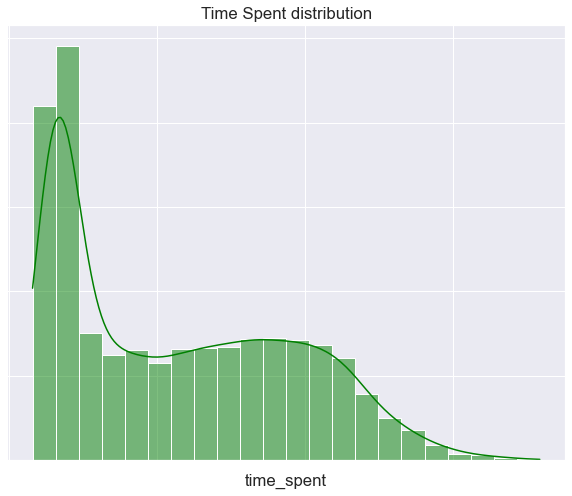

In [7]:
plt.figure(figsize=(10,8))
sns.despine(left=True, bottom=True)
sns.set_theme(style="ticks")
sns.set(font_scale=1.4)

ax=sns.histplot(train["time_spent"],log_scale=10,kde=True,color="green")

plt.title("Time Spent distribution")
ax.set(ylabel='')
ax.set(xticklabels='')
ax.set(yticklabels="")

##### The above time spent feature distribution is highly right skewed.(for the better visualation log scale applied)

##### Let's visualize the time spent feature with boxplot

Text(0.5, 1.0, 'Time Spent Boxplot')

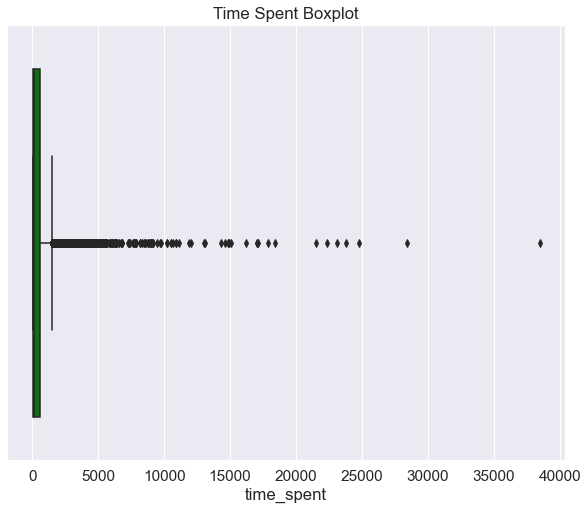

In [8]:
plt.figure(figsize=(10,8))
sns.despine(left=True, bottom=True)
sns.set_theme(style="ticks")
sns.set(font_scale=1.4)
bx=sns.boxplot(data=train ,x="time_spent",color="green")
plt.title("Time Spent Boxplot")

##### The above plot shows that there are lot of outlier points above the Quartile-3

##### Let's check the summary of the time spent feature

In [9]:
train["time_spent"].describe()

count     5429.000000
mean       663.194292
std       1713.671664
min         14.400000
25%         22.699000
50%         98.312000
75%        600.463000
max      38494.025000
Name: time_spent, dtype: float64

##### Let's look the session number feature and see the distribution

##### Let's see the quick summary of the session number

In [10]:
train["session_number"].describe()

count    5429.000000
mean     1072.835329
std      1436.351474
min        11.000000
25%       121.000000
50%       517.000000
75%      1397.000000
max      7722.000000
Name: session_number, dtype: float64

##### Let's plot the session number using histogram

Text(0.5, 1.0, 'Session number distribution')

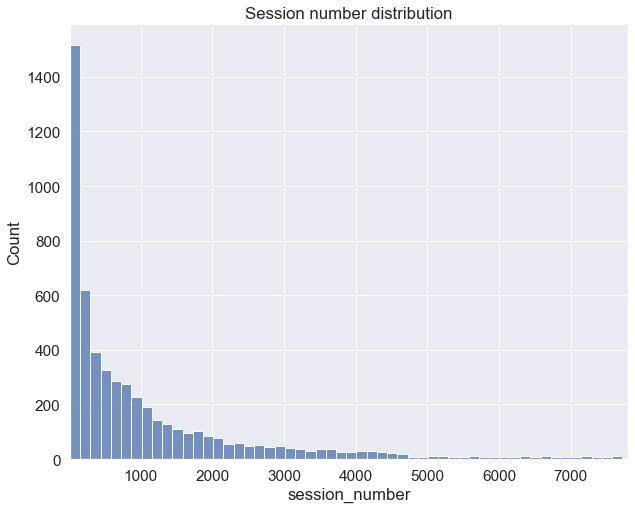

In [11]:
plt.figure(figsize=(10,8))
sns.despine(left=True, bottom=True)
sns.set_theme(style="ticks")
sns.set(font_scale=1.4)
sns.histplot(train["session_number"])
plt.xlim(10,7800)
plt.title("Session number distribution")

##### Let's see the top 10 session session number which has most number of sessions over the year

In [12]:
train["session_number"].value_counts().head(10)

11     437
22     192
33     132
44     101
55      93
66      92
77      79
110     73
88      70
99      66
Name: session_number, dtype: int64

##### Let's see what are the devices and applications are used to visit the website

Text(0.5, 1.0, 'Various Devices Used to Visit The Site')

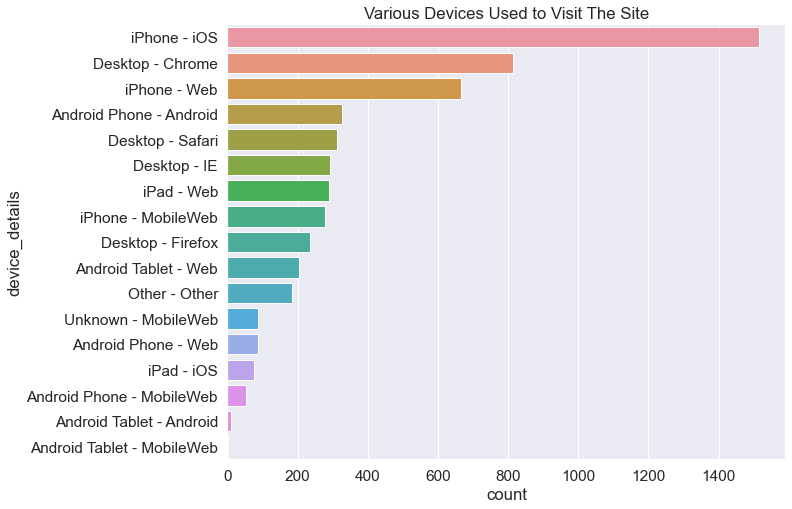

In [13]:
plt.figure(figsize=(10,8))
sns.despine(left=True, bottom=True)
sns.set_theme(style="ticks")
sns.set(font_scale=1.4)
device = sns.countplot(y="device_details",
            data=train,
             order= train["device_details"].value_counts().index
              
              )
plt.title("Various Devices Used to Visit The Site")

In [14]:
train["device_details"].value_counts()

iPhone - iOS                  1515
Desktop - Chrome               815
iPhone - Web                   665
Android Phone - Android        326
Desktop - Safari               313
Desktop - IE                   292
iPad - Web                     289
iPhone - MobileWeb             277
Desktop - Firefox              234
Android Tablet - Web           203
Other - Other                  185
Unknown - MobileWeb             87
Android Phone - Web             86
iPad - iOS                      77
Android Phone - MobileWeb       54
Android Tablet - Android         9
Android Tablet - MobileWeb       2
Name: device_details, dtype: int64

##### The above chart shows that most visitors are iphone users 

##### Let's see the customer spending time on website and see how its changes on various devices.

Text(0.5, 1.0, "Different Devices's Time spent Distribution Using Violin Plot")

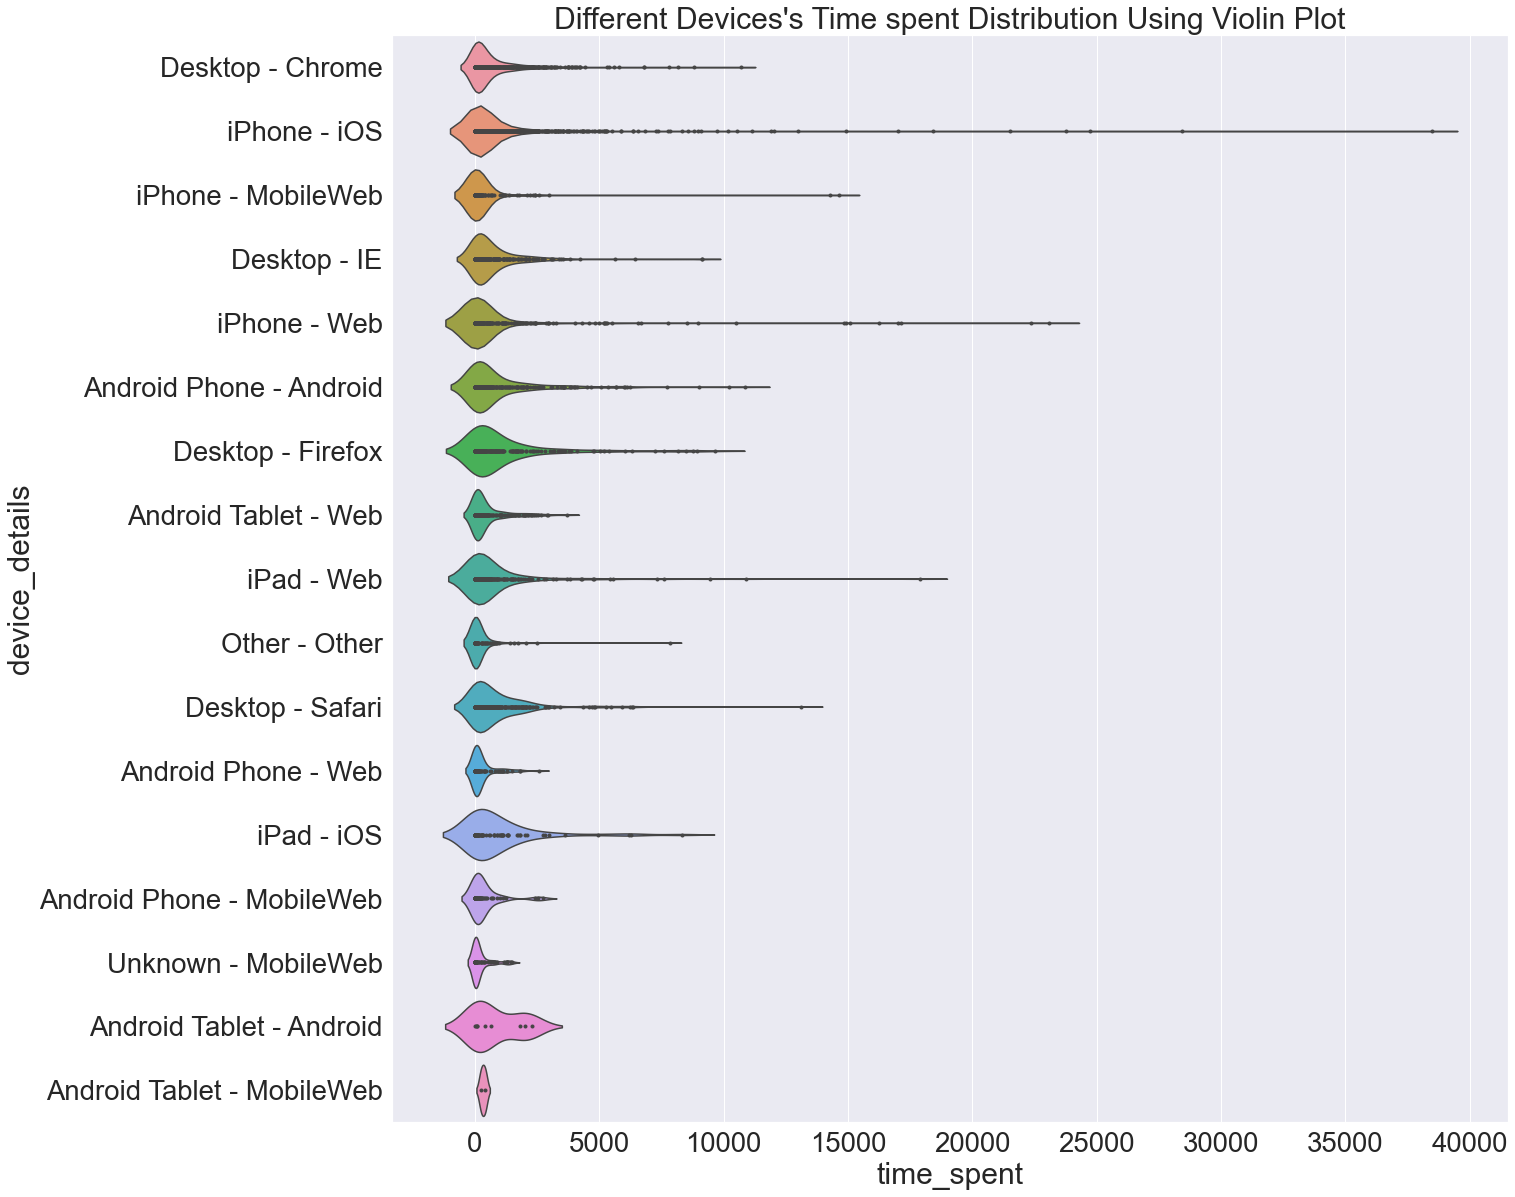

In [15]:
plt.figure(figsize=(20,20))
sns.despine(left=True, bottom=True)
sns.set(font_scale=2.5)
device_timespent = sns.violinplot(
    data=train, inner="point",
    y="device_details", x="time_spent",scale="width"
)
plt.title("Different Devices's Time spent Distribution Using Violin Plot")


##### The violin plot explains that apple company device users are spending more time on website than others.

##### The next feature is in date format so split the date into the day, month year, and see how customers are spending time on website changes over time.

##### Before to split the date , the date should be converted into datetime format by using pandas datetime function.

In [16]:
train['date'] = pd.to_datetime(train['date'], errors='coerce')

In [17]:
train['day'],train['day_label'],train['day_number'],train['month_number'],train['month_label'],train['year_quarter'],train['week_of_year'],train['year'] = train['date'].dt.day,train['date'].dt.day_name(), train['date'].dt.dayofweek,train['date'].dt.month,train['date'].dt.strftime('%b'),train['date'].dt.quarter,train['date'].dt.week, train['date'].dt.year

##### Let's see the splitted day,month,year column

In [18]:
train.head(2)

,session_id,session_number,client_agent,device_details,date,purchased,added_in_cart,checked_out,time_spent,day,day_label,day_number,month_number,month_label,year_quarter,week_of_year,year
0,57f879e70d3c5fc2a98102d64c9fd84e,715,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,Desktop - Chrome,2020-01-22,1,0,0,236.886,22,Wednesday,2,1,Jan,1,4,2020
1,a5442b0c7c33d0a811e7661e556b2de8,55,Product/8.0 iPhone/8.1.3,iPhone - iOS,2020-02-27,1,0,0,1277.455,27,Thursday,3,2,Feb,1,9,2020


##### Re-arrange the day,month,year column after the date column

In [19]:
train=train.iloc[:,np.r_[0:5,9:17,5:9]]

##### Let's see the Re-arranged column dataframe

In [20]:
train.head(2)

,session_id,session_number,client_agent,device_details,date,day,day_label,day_number,month_number,month_label,year_quarter,week_of_year,year,purchased,added_in_cart,checked_out,time_spent
0,57f879e70d3c5fc2a98102d64c9fd84e,715,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,Desktop - Chrome,2020-01-22,22,Wednesday,2,1,Jan,1,4,2020,1,0,0,236.886
1,a5442b0c7c33d0a811e7661e556b2de8,55,Product/8.0 iPhone/8.1.3,iPhone - iOS,2020-02-27,27,Thursday,3,2,Feb,1,9,2020,1,0,0,1277.455


In [21]:
min(train["date"]),max(train["date"])


(Timestamp('2019-05-06 00:00:00'), Timestamp('2020-04-23 00:00:00'))

##### Let's visualize the customer's spending time on website from 06-May-2019 To 23-April-2020

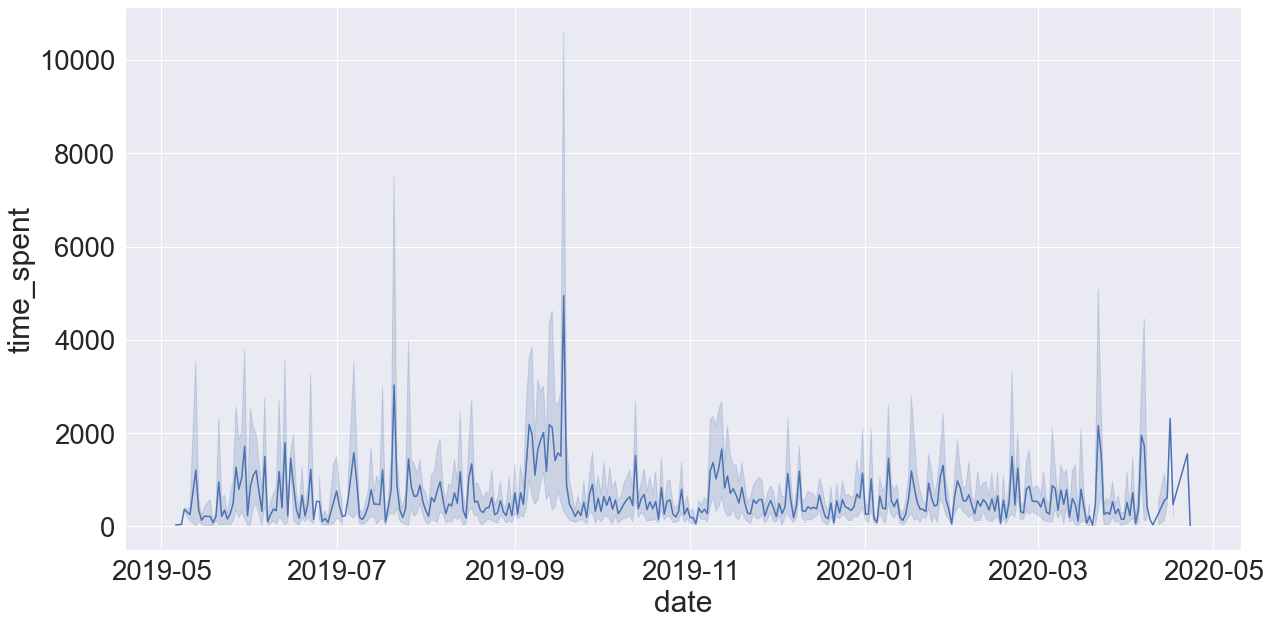

In [22]:
plt.figure(figsize=(20,10))
sns.despine(left=False, bottom=False)
sns.set(font_scale=2.5)
time_spent_year = sns.lineplot(x="date",y="time_spent",
             data=train)

##### Highest customer spending time recorded in july, september month of 2019

##### Let's view the total sum of customer's time spending on website in each month of 2019 and 2020

##### In the year 2019, may to december records are only available.
##### In the year 2020, jan to april records are only availabel.

##### Let's create a year and month wise time spending dataframe and visualize using line plot

In [23]:
month_year_spent = train.groupby(["year","month_label",'month_number']). agg({'time_spent':["sum"]})
month_year_spent.columns = ['time_spent']
month_year_spent= month_year_spent.reset_index()
month_year_spent=month_year_spent.sort_values("month_number", ascending=True)
month_year_spent

,year,month_label,month_number,time_spent
10,2020,Jan,1,301852.533
9,2020,Feb,2,306616.300
11,2020,Mar,3,173380.530
8,2020,Apr,4,56013.231
4,2019,May,5,72951.036
3,2019,Jun,6,138978.605
2,2019,Jul,7,299795.474
0,2019,Aug,8,238769.650
7,2019,Sep,9,1014014.472
6,2019,Oct,10,273100.187


<Figure size 1080x720 with 0 Axes>

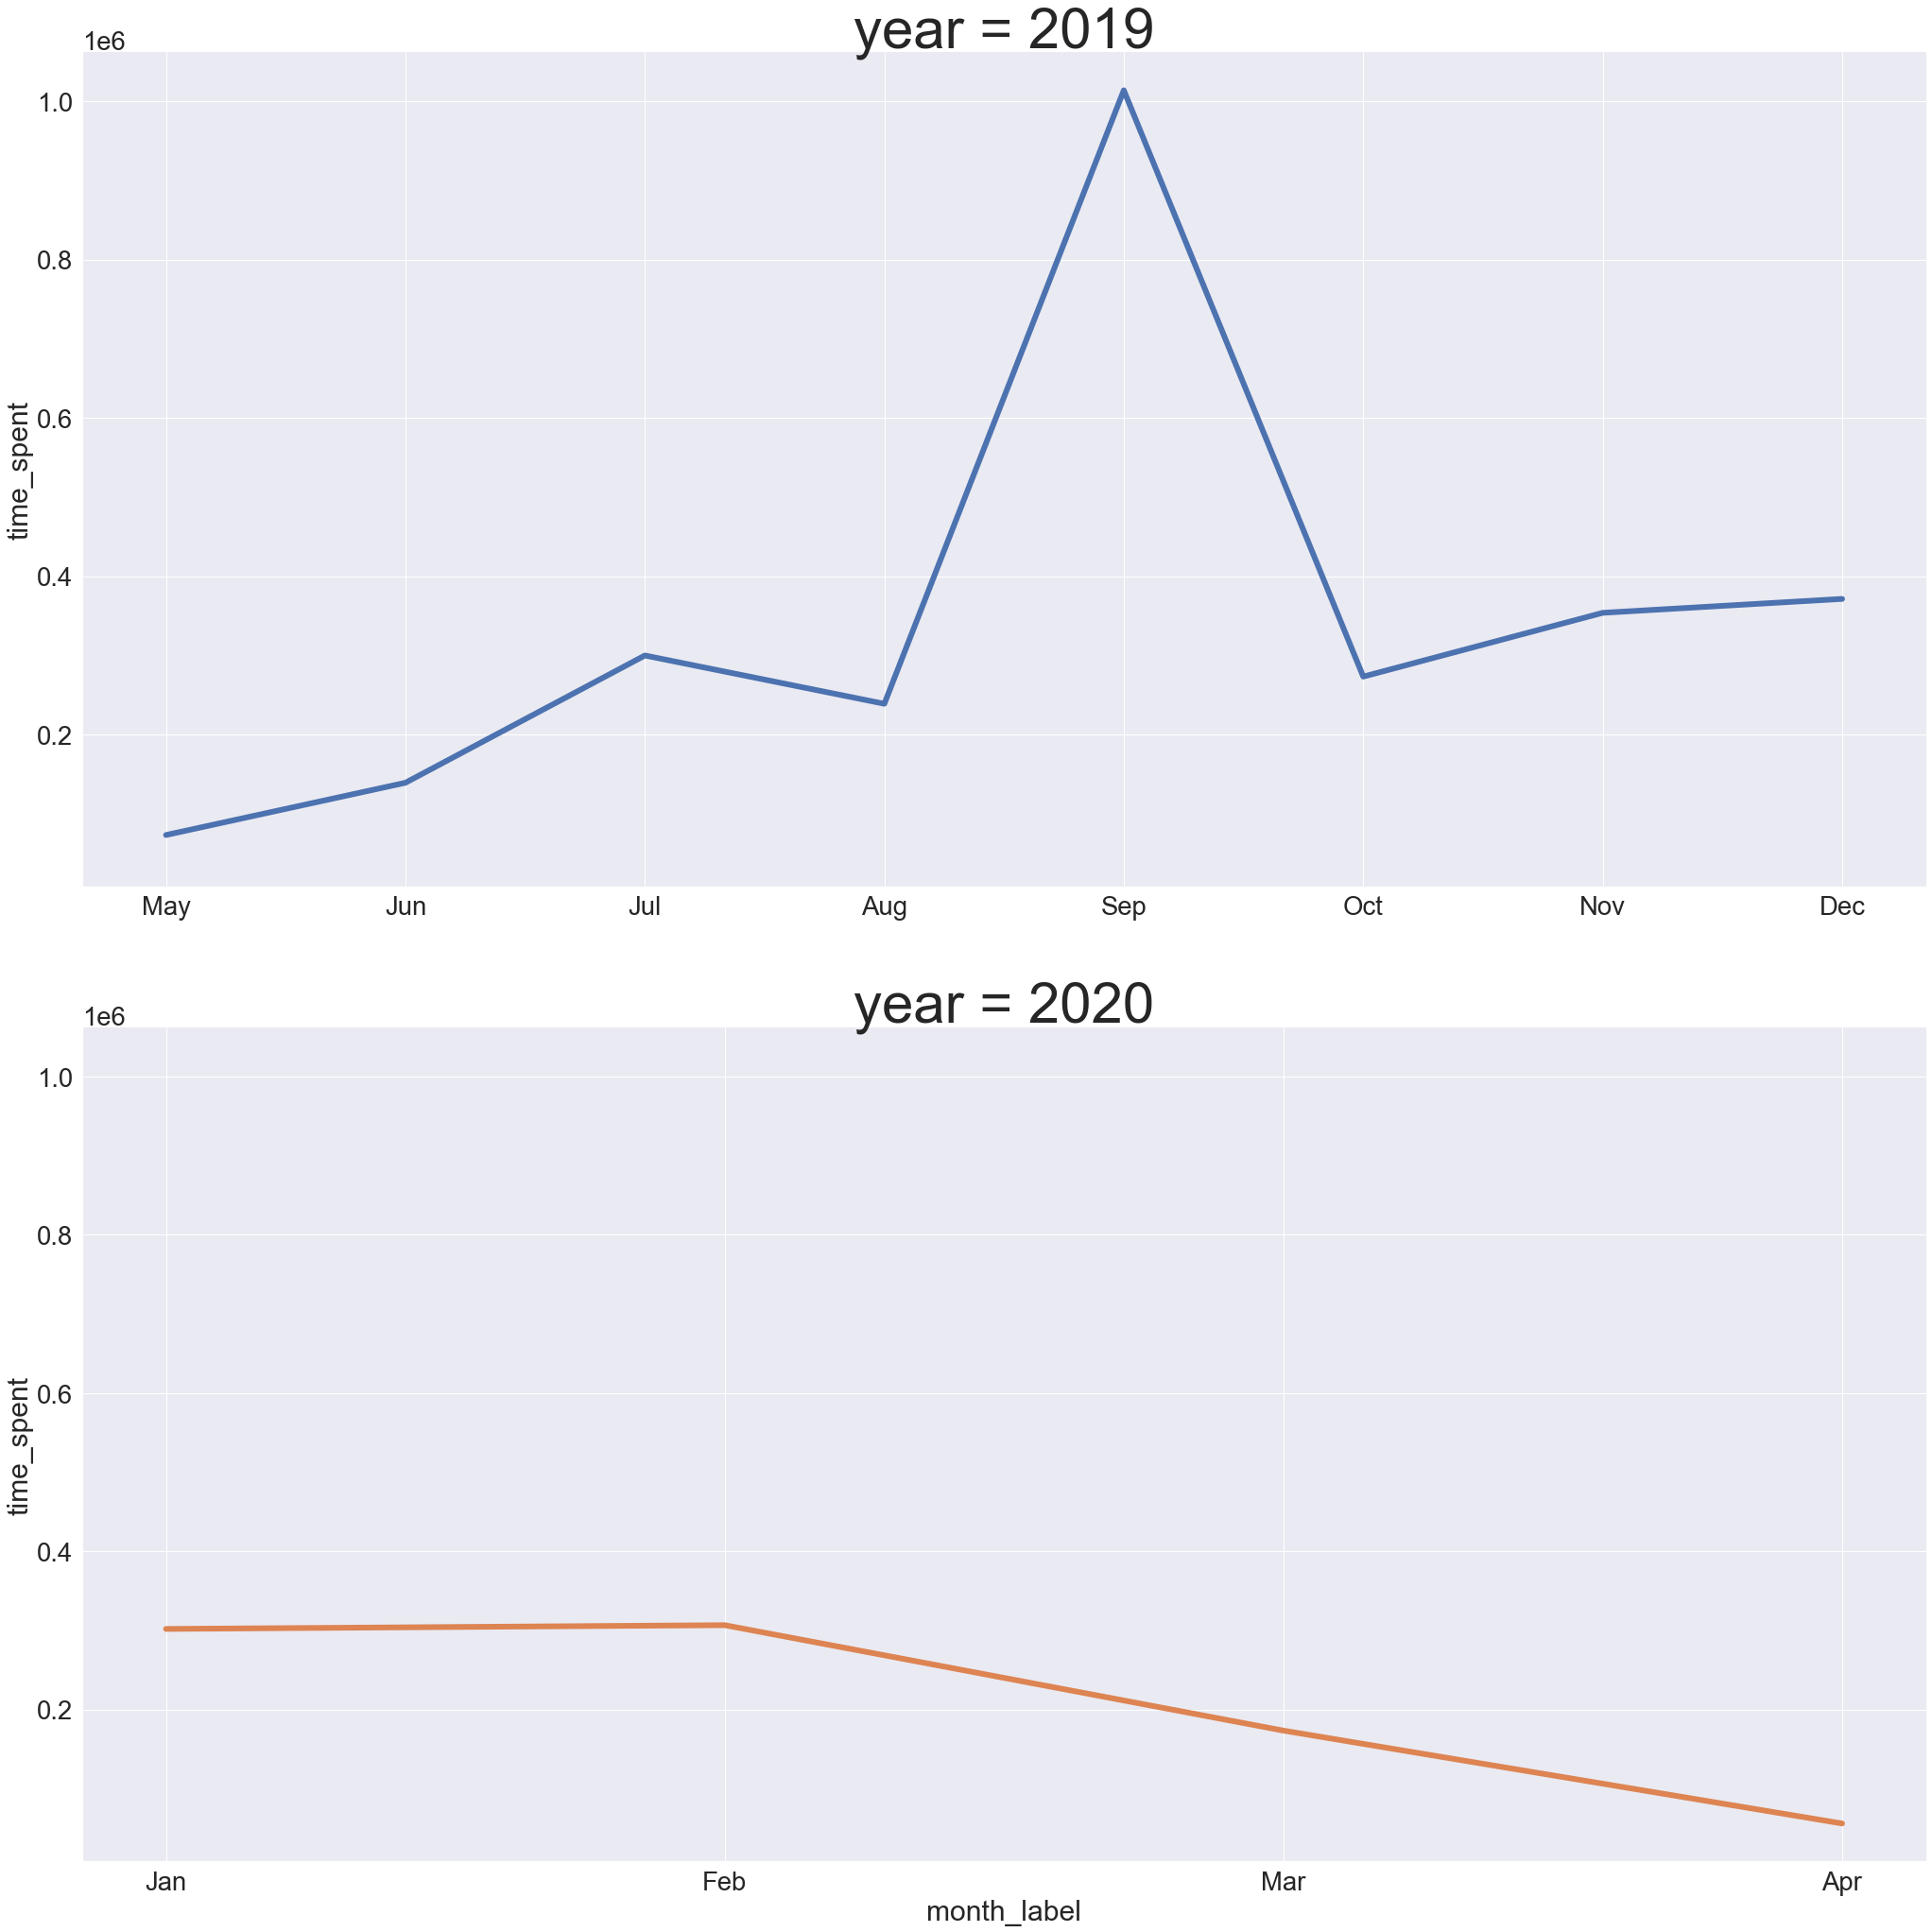

In [24]:
plt.figure(figsize=(15,10))
time_spent_year = sns.FacetGrid(month_year_spent,despine=True, row="year", hue="year",sharey=True, sharex=False, height=15, aspect = 2)
sns.set(font_scale=5)
time_spent_year.map(sns.lineplot,"month_label","time_spent",linewidth = 6,sort=True)

##### The above plot shows that in the year 2019, September month has recorded the highest customer activity on the website.
##### In the year 2020 highest customer activity recored in the month of january and february.After february customer activity gradually decreased.

##### Let's see which week has recorded highest number of customer activity in the year 2019 & 2020.

In [25]:
week_year_spent = train.groupby(["year",'week_of_year']). agg({'time_spent':["sum"]})
week_year_spent.columns = ['time_spent']
week_year_spent= week_year_spent.reset_index()
week_year_spent=week_year_spent.sort_values("week_of_year", ascending=True)
week_year_spent.head()

,year,week_of_year,time_spent
0,2019,1,43483.519
35,2020,1,24758.559
36,2020,2,87878.415
37,2020,3,54362.882
38,2020,4,70617.837


<Figure size 1080x720 with 0 Axes>

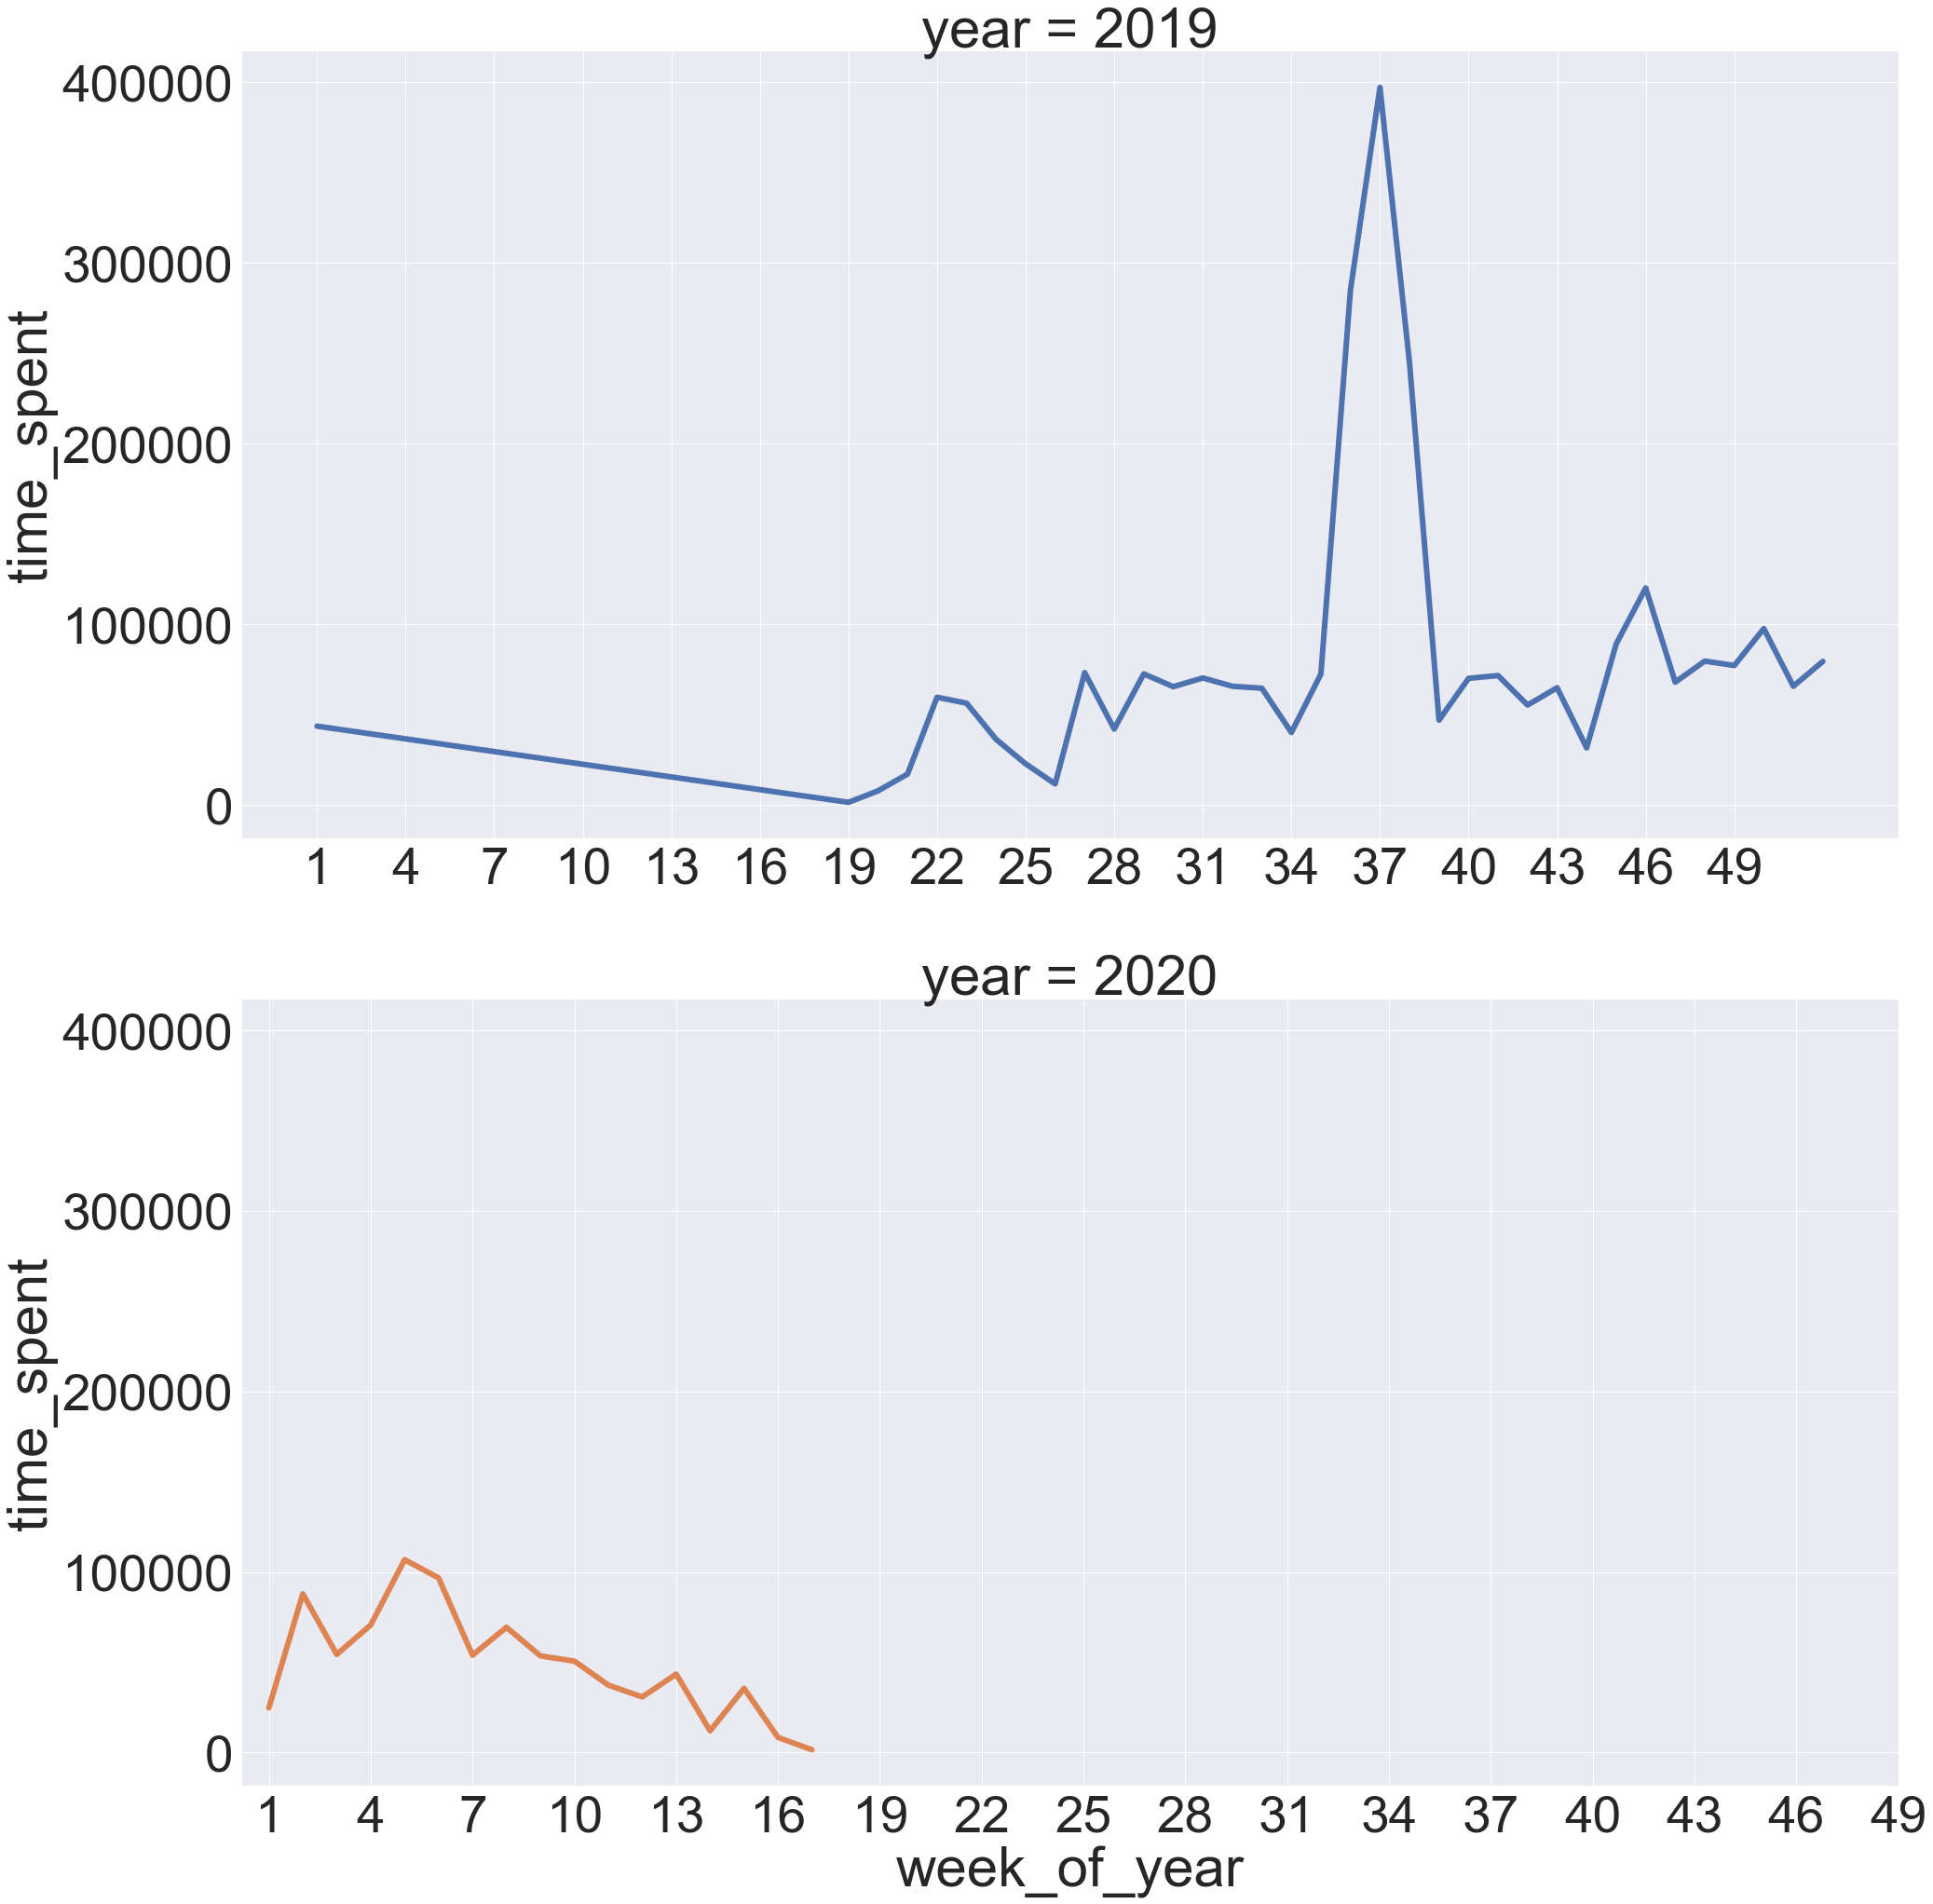

In [26]:
plt.figure(figsize=(15,10))
time_spent_week_year = sns.FacetGrid(week_year_spent,despine=True, row="year", hue="year",sharey=True, sharex=False, height=15, aspect = 2)
sns.set(font_scale=5)
time_spent_week_year.map(sns.lineplot,"week_of_year","time_spent",linewidth = 6)
time_spent_week_year.set(xticks=(np.arange(1,52,3)))

##### The above plot shows that in the year 2019, highest number of customer activity recorded in the week 37.In 2020, week 2, 4, 5 has recorded highest number of customer activity.

##### Let's see which day of the week has the highest number of customer activity in each month of the years 2019 & 2020.

In [27]:
day_week_spent = train.groupby(["year",'month_label','month_number','day_number','day_label']). agg({'time_spent':["sum"]})
day_week_spent.columns = ['time_spent']
day_week_spent= day_week_spent.reset_index()
day_week_spent=day_week_spent.sort_values(["month_number","day_number"], ascending=True)
day_week_spent

,year,month_label,month_number,day_number,day_label,time_spent
70,2020,Jan,1,0,Monday,43205.976
71,2020,Jan,1,1,Tuesday,40385.692
72,2020,Jan,1,2,Wednesday,35792.075
73,2020,Jan,1,3,Thursday,62778.004
74,2020,Jan,1,4,Friday,53216.068
...,...,...,...,...,...,...
9,2019,Dec,12,2,Wednesday,27748.977
10,2019,Dec,12,3,Thursday,47882.580
11,2019,Dec,12,4,Friday,37283.641
12,2019,Dec,12,5,Saturday,28812.208


<Figure size 1080x720 with 0 Axes>

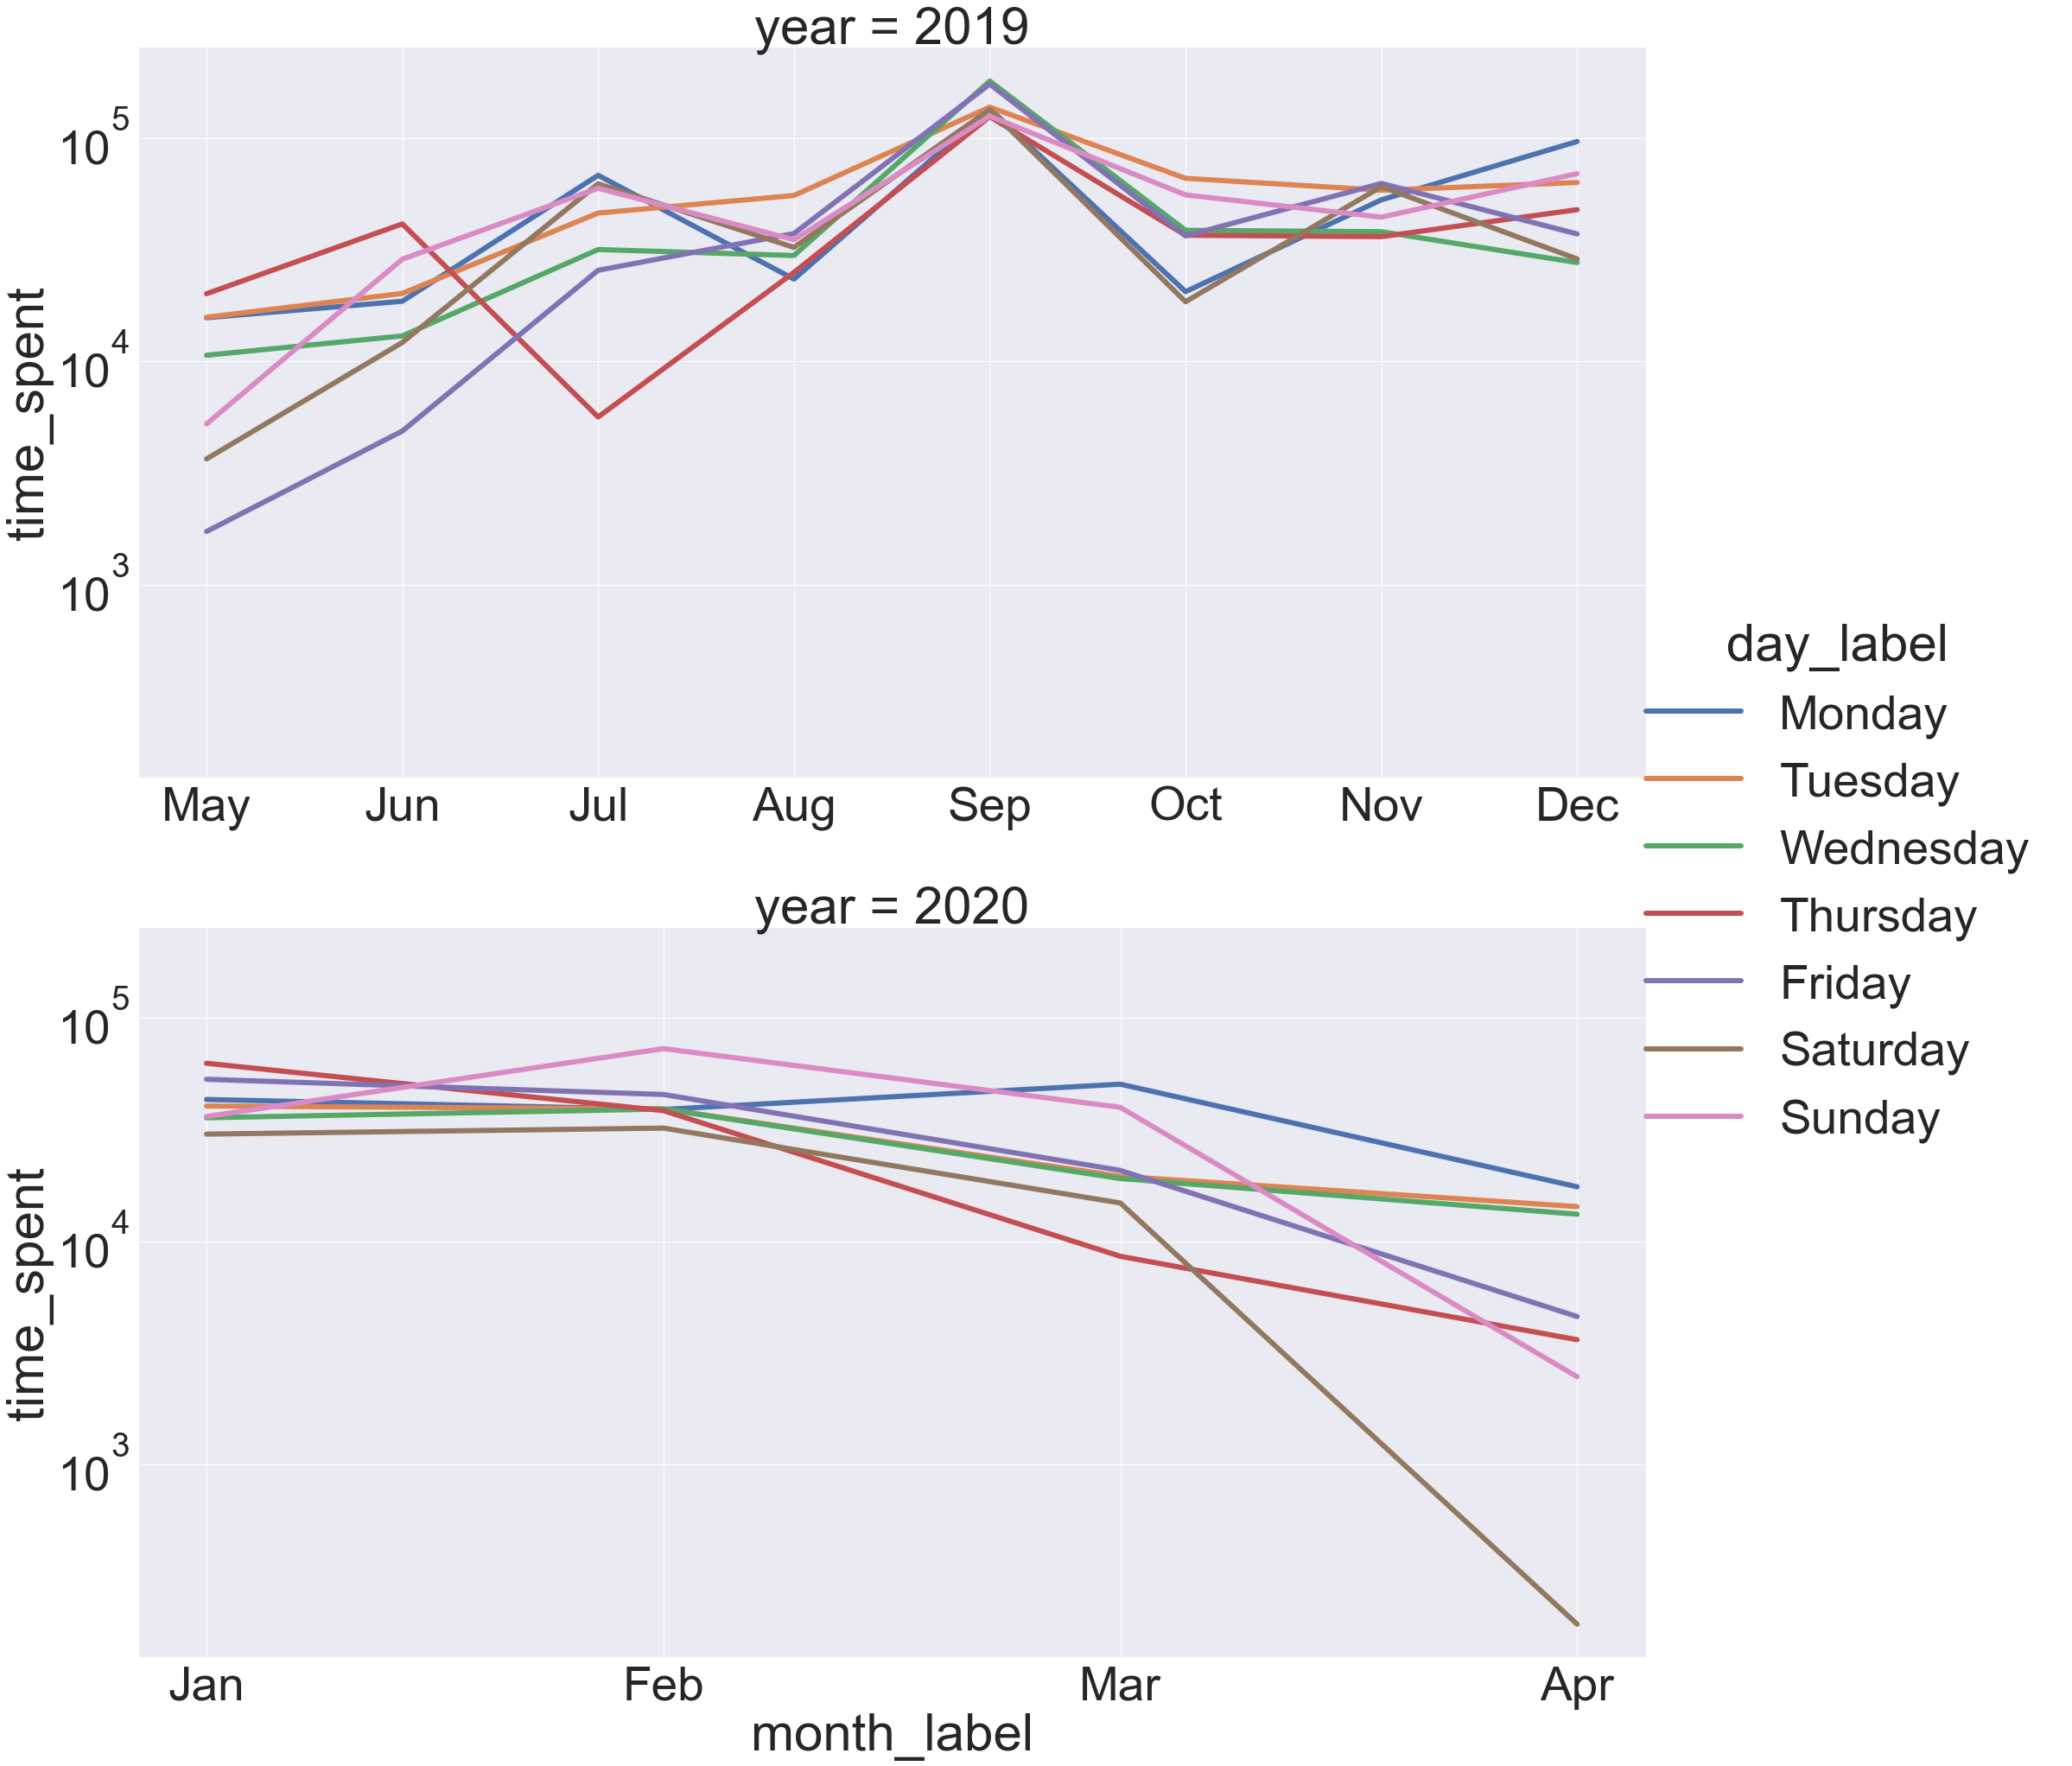

In [28]:
plt.figure(figsize=(15,10))
time_spent_dayweek = sns.FacetGrid(day_week_spent,despine=True, row="year", hue="day_label",sharey=True, sharex=False, height=15, aspect = 2)
sns.set(font_scale=5)
time_spent_dayweek.map(sns.lineplot,"month_label","time_spent",linewidth = 6).set(yscale = 'log')
time_spent_dayweek.add_legend()

##### The above chart shows that in the year 2019, the highest number of customer activity recorded on each day of the week in September.In 2020 the lowest customer activity recorded in april month saturday's and highest customer activity recorded in february month sunday's.

##### Let's see which quarter of the year has recorded highest number of customer activity.

In [29]:
quart_year_spent = train.groupby(["year",'year_quarter']). agg({'time_spent':["sum"]})
quart_year_spent.columns = ['time_spent']
quart_year_spent= quart_year_spent.reset_index()
quart_year_spent=quart_year_spent.sort_values("year_quarter", ascending=True)
quart_year_spent

,year,year_quarter,time_spent
3,2020,1,781849.363
0,2019,2,211929.641
4,2020,2,56013.231
1,2019,3,1552579.596
2,2019,4,998109.978


<Figure size 1080x720 with 0 Axes>

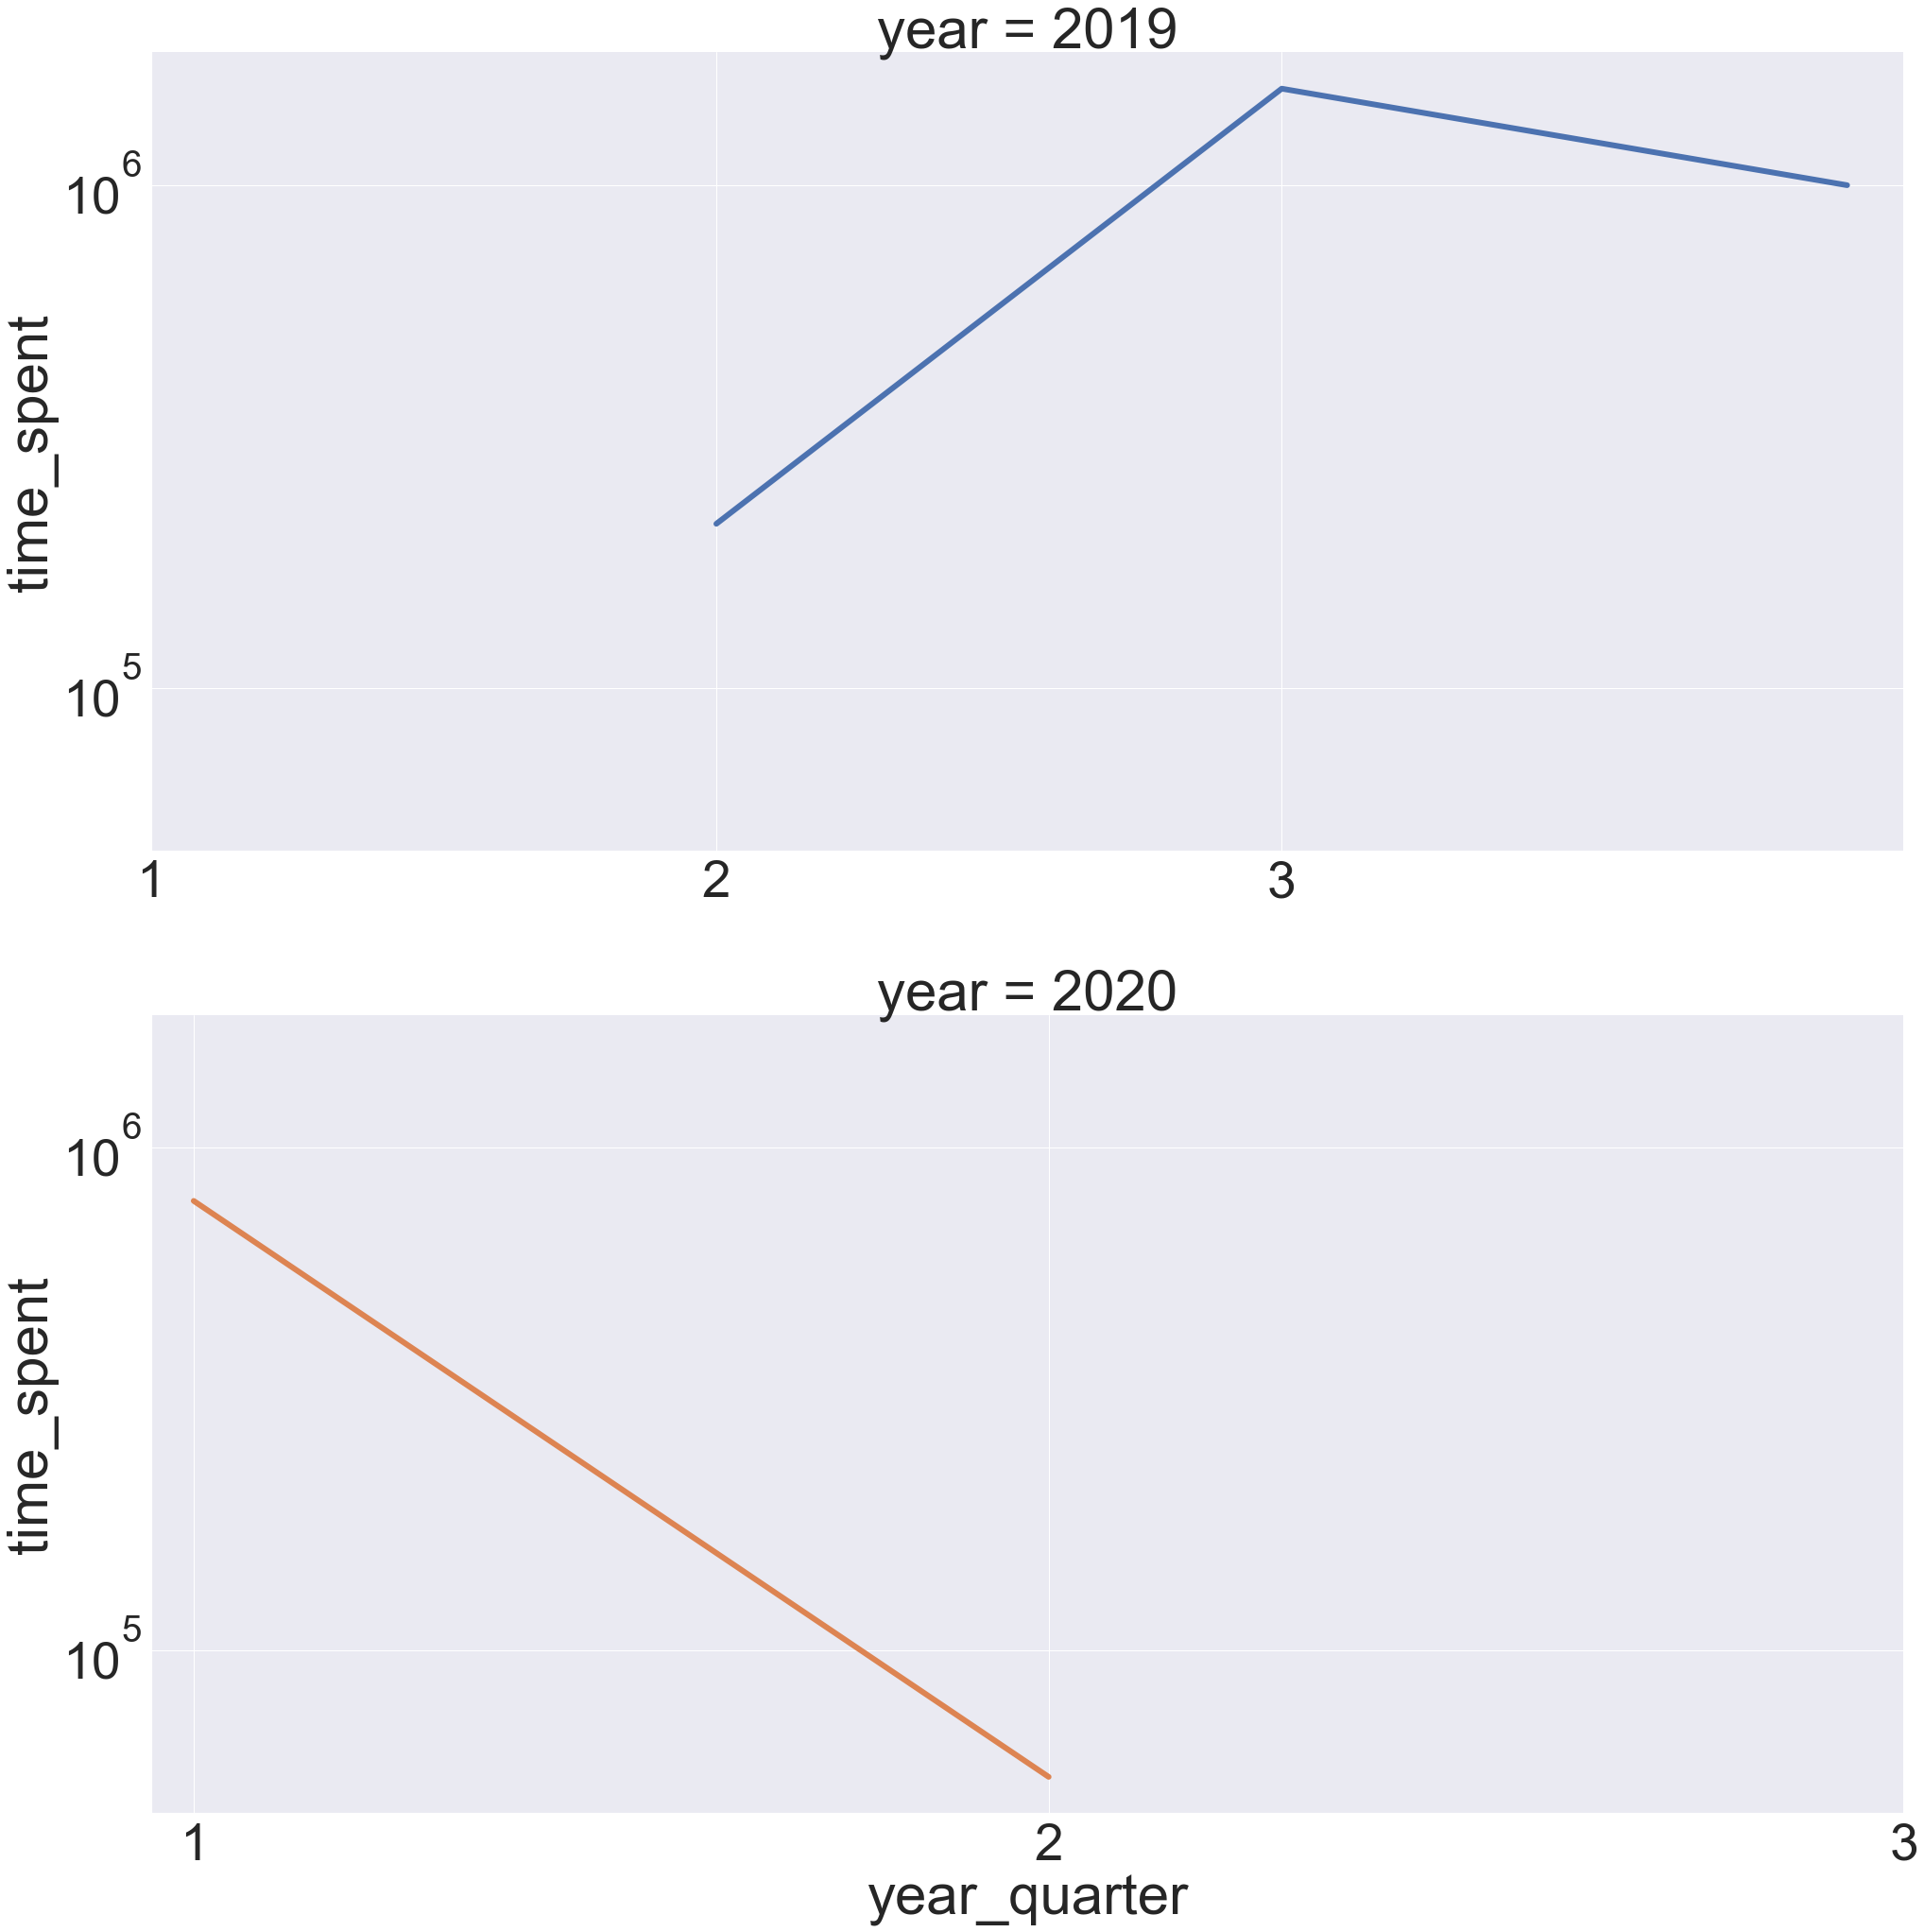

In [30]:
plt.figure(figsize=(15,10))
quarter_spent = sns.FacetGrid(quart_year_spent,despine=True, row="year", hue="year",sharey=True,
                                   sharex=False, height=15, aspect = 2)
sns.set(font_scale=5)
quarter_spent.map(sns.lineplot,"year_quarter","time_spent",linewidth = 6).set(yscale = 'log')
quarter_spent.set(xticks=(np.arange(1,4,1)))
plt.show()


##### The above plot explains that in the year 2019, the customer activity has increased in the third quarter. In 2020, the second quarter has the lowest customer website activity than the year 2019's second quarter.

##### Let's create a calender plot and see how long the customer's spending time on website.

In [31]:
events = pd.Series(train["time_spent"].values, index=train["date"])

In [32]:
events

date
2020-01-22     236.886
2020-02-27    1277.455
2019-08-01      21.704
2019-12-30     455.201
2019-09-10    1164.877
                ...   
2019-11-20      20.601
2019-09-26    1537.666
2019-08-13      22.711
2019-06-18      20.844
2019-10-21      20.504
Length: 5429, dtype: float64

##### Let's see the customer's spending time on website with calendar plot

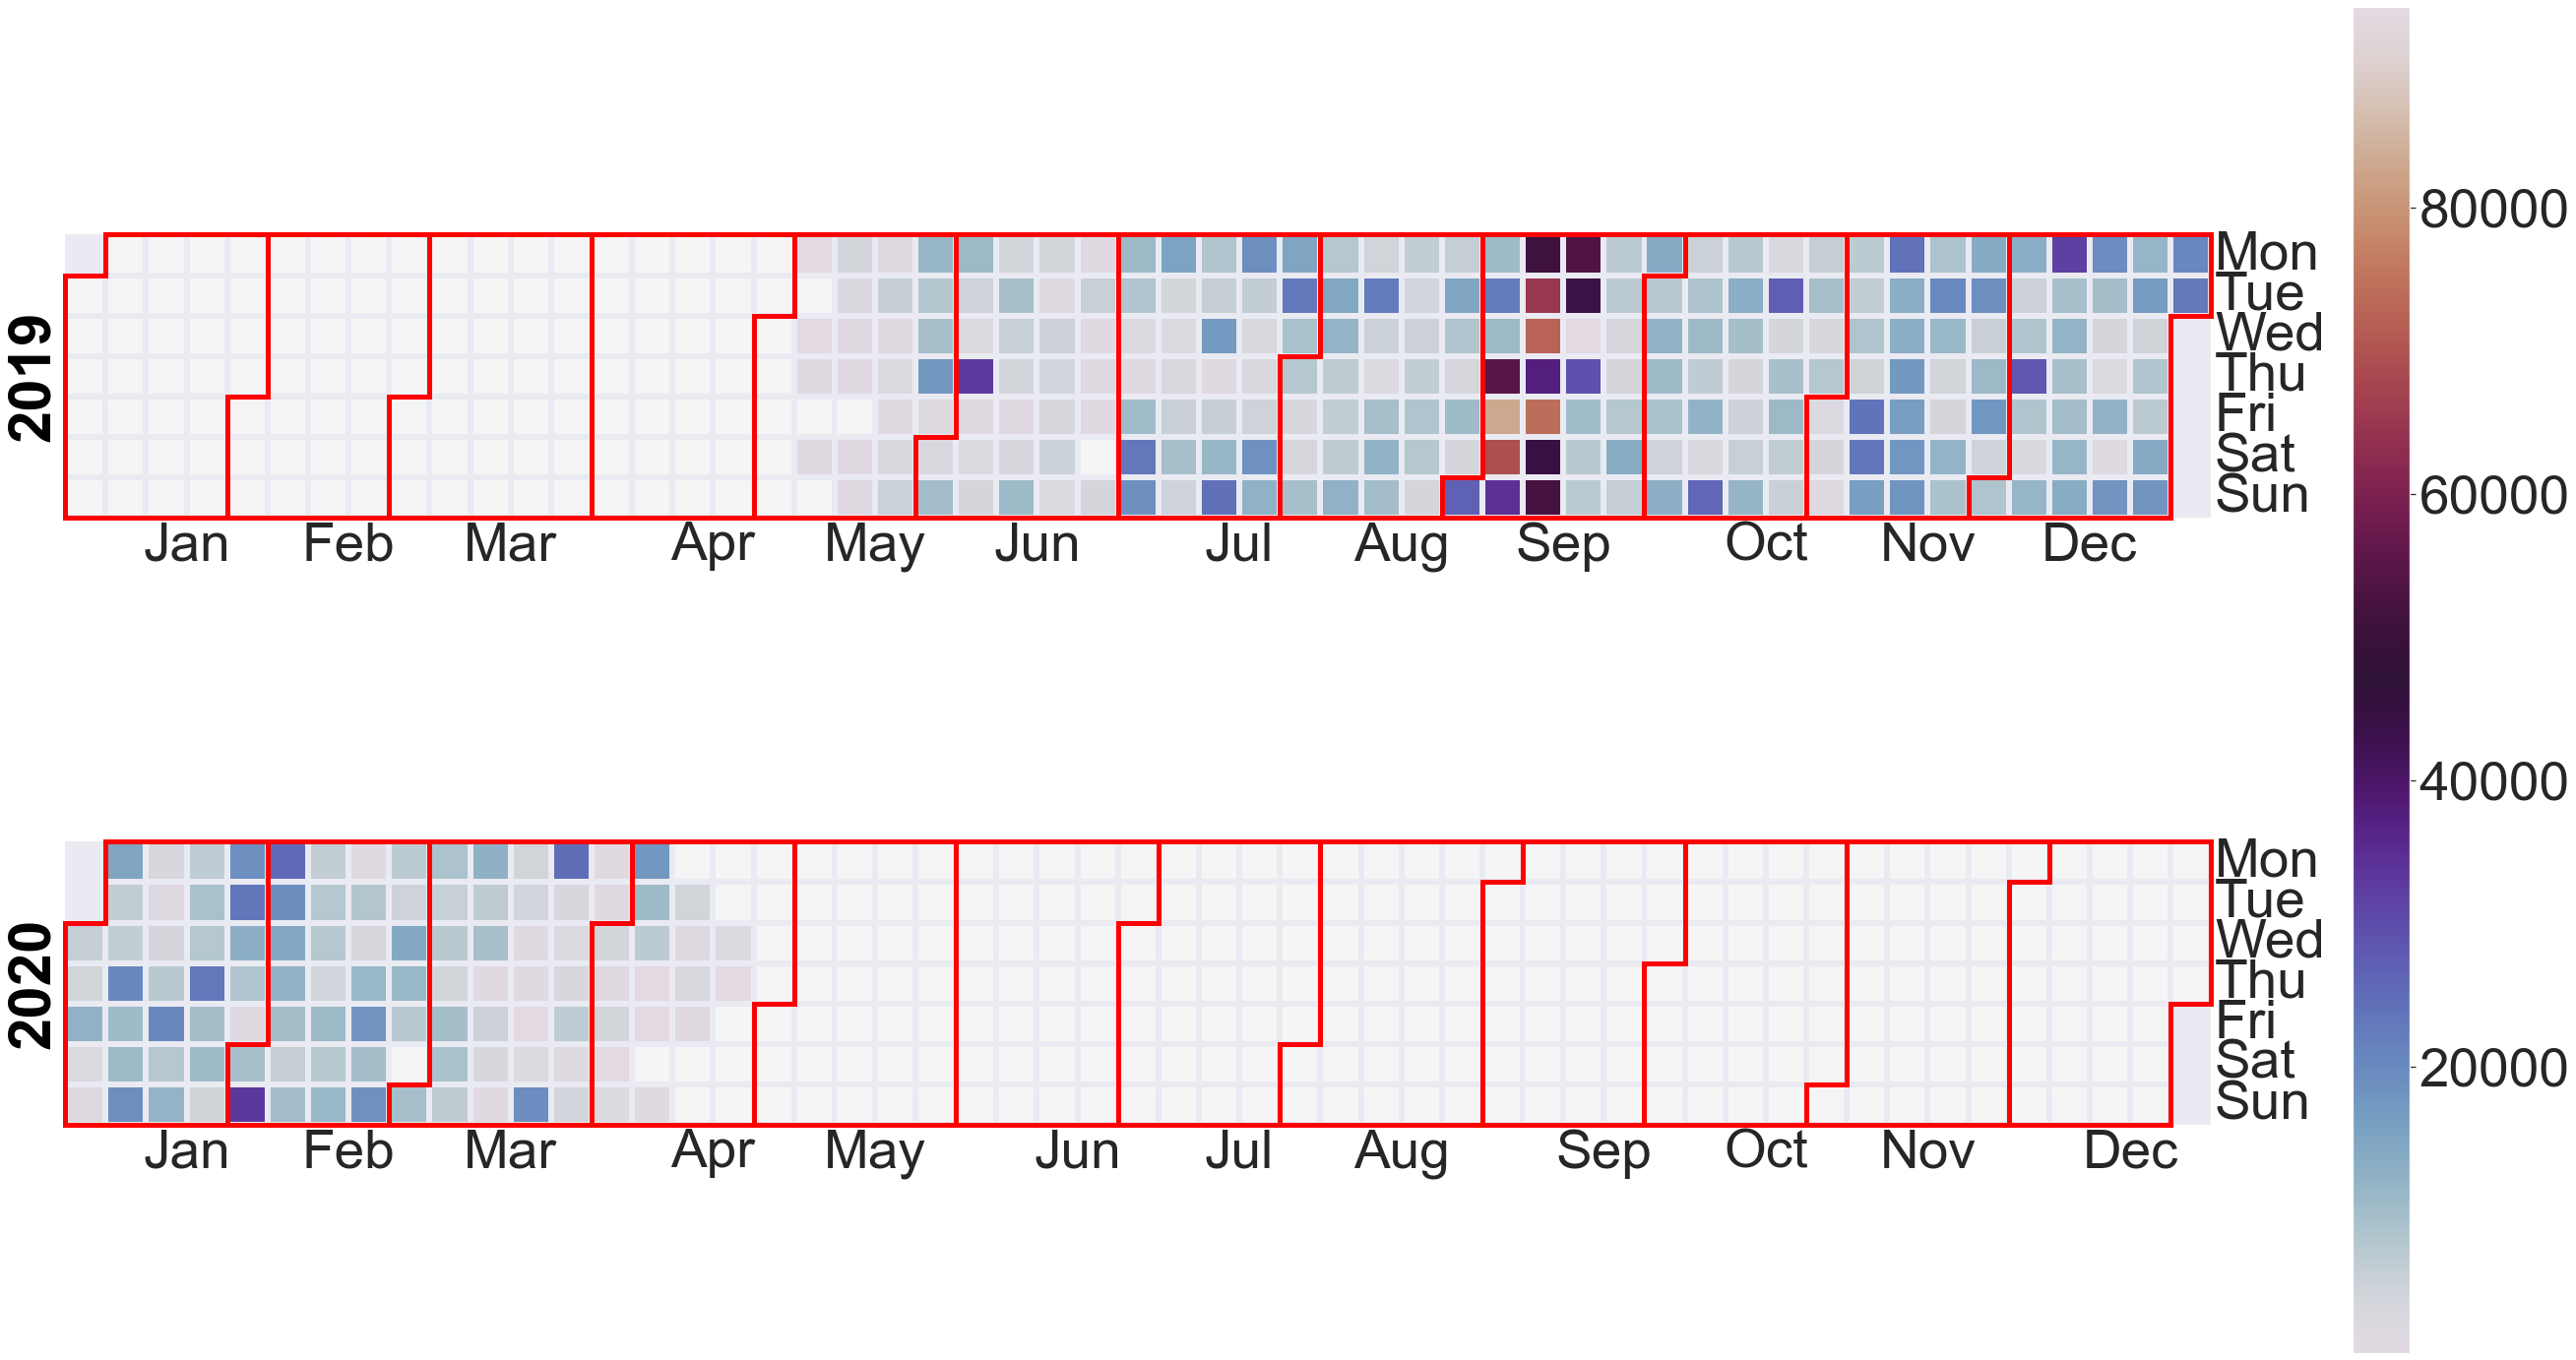

In [33]:

cal_plot=calplot.calplot(events,edgecolor="red",yearcolor="black",cmap='twilight',linewidth=5,
                         yearlabel_kws = {"fontsize":"medium"},
                        figsize=(40,20))


##### Let's view the unique combination of purchased, added_in_cart & checked_out columns.

In [34]:
train.groupby(["purchased","added_in_cart","checked_out"], as_index=False).size()

,purchased,added_in_cart,checked_out,size
0,0,0,0,3847
1,0,0,1,11
2,0,1,0,682
3,0,1,1,25
4,1,0,0,679
5,1,0,1,12
6,1,1,0,126
7,1,1,1,47


##### There are 8 unique combinations are there. Now create a category column based on the combinations

In [35]:
conditions= [(train["purchased"]==0) & (train["added_in_cart"]==0) &(train["checked_out"]==0),
           (train["purchased"]==0) & (train["added_in_cart"]==0) &(train["checked_out"]==1),
           (train["purchased"]==0) & (train["added_in_cart"]==1) &(train["checked_out"]==0),
           (train["purchased"]==0) & (train["added_in_cart"]==1) &(train["checked_out"]==1),
           (train["purchased"]==1) & (train["added_in_cart"]==0) &(train["checked_out"]==0),
           (train["purchased"]==1) & (train["added_in_cart"]==0) &(train["checked_out"]==1),
           (train["purchased"]==1) & (train["added_in_cart"]==1) &(train["checked_out"]==0),
           (train["purchased"]==1) & (train["added_in_cart"]==1) &(train["checked_out"]==1)]

values = ['no_activity', 'chk', 'add', 'add_chk','purc','purc_chk','purc_add','purc_add_chk']


##### Using numpy select functions create a category column

In [36]:
train['customer_activity'] = np.select(conditions, values)


##### Let's see how the customer's activity classified on website.

Text(0.5, 1.0, "Customer's Various Activity on Website")

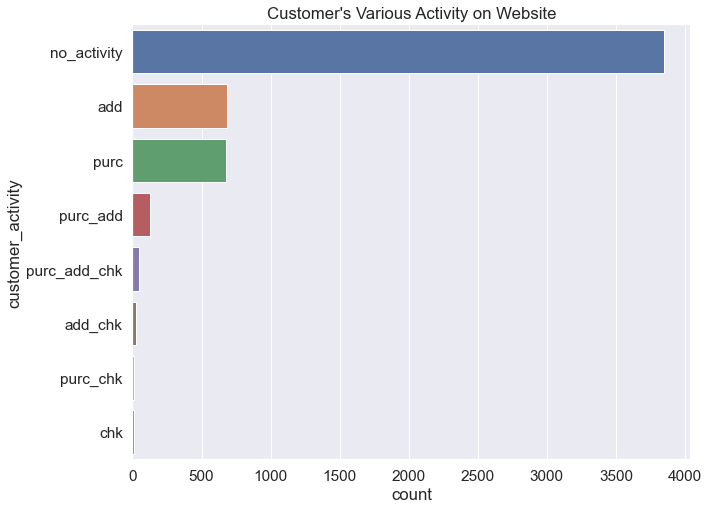

In [37]:
plt.figure(figsize=(10,8))
sns.despine(left=True, bottom=True)
sns.set_theme(style="ticks")
sns.set(font_scale=1.4)
cust_activity = sns.countplot(y="customer_activity",
            data=train,
             order= train["customer_activity"].value_counts().index
              
              )
plt.title("Customer's Various Activity on Website")

In [38]:
train['customer_activity'].value_counts()

no_activity     3847
add              682
purc             679
purc_add         126
purc_add_chk      47
add_chk           25
purc_chk          12
chk               11
Name: customer_activity, dtype: int64

##### The above plot explains that most of the customers are only just visiting the site.

In [39]:
##### Let's see the customer spending time on website and see how its changes on various customer activity.

Text(0.5, 1.0, 'Customers Activities Time spent Distribution Using Violin Plot')

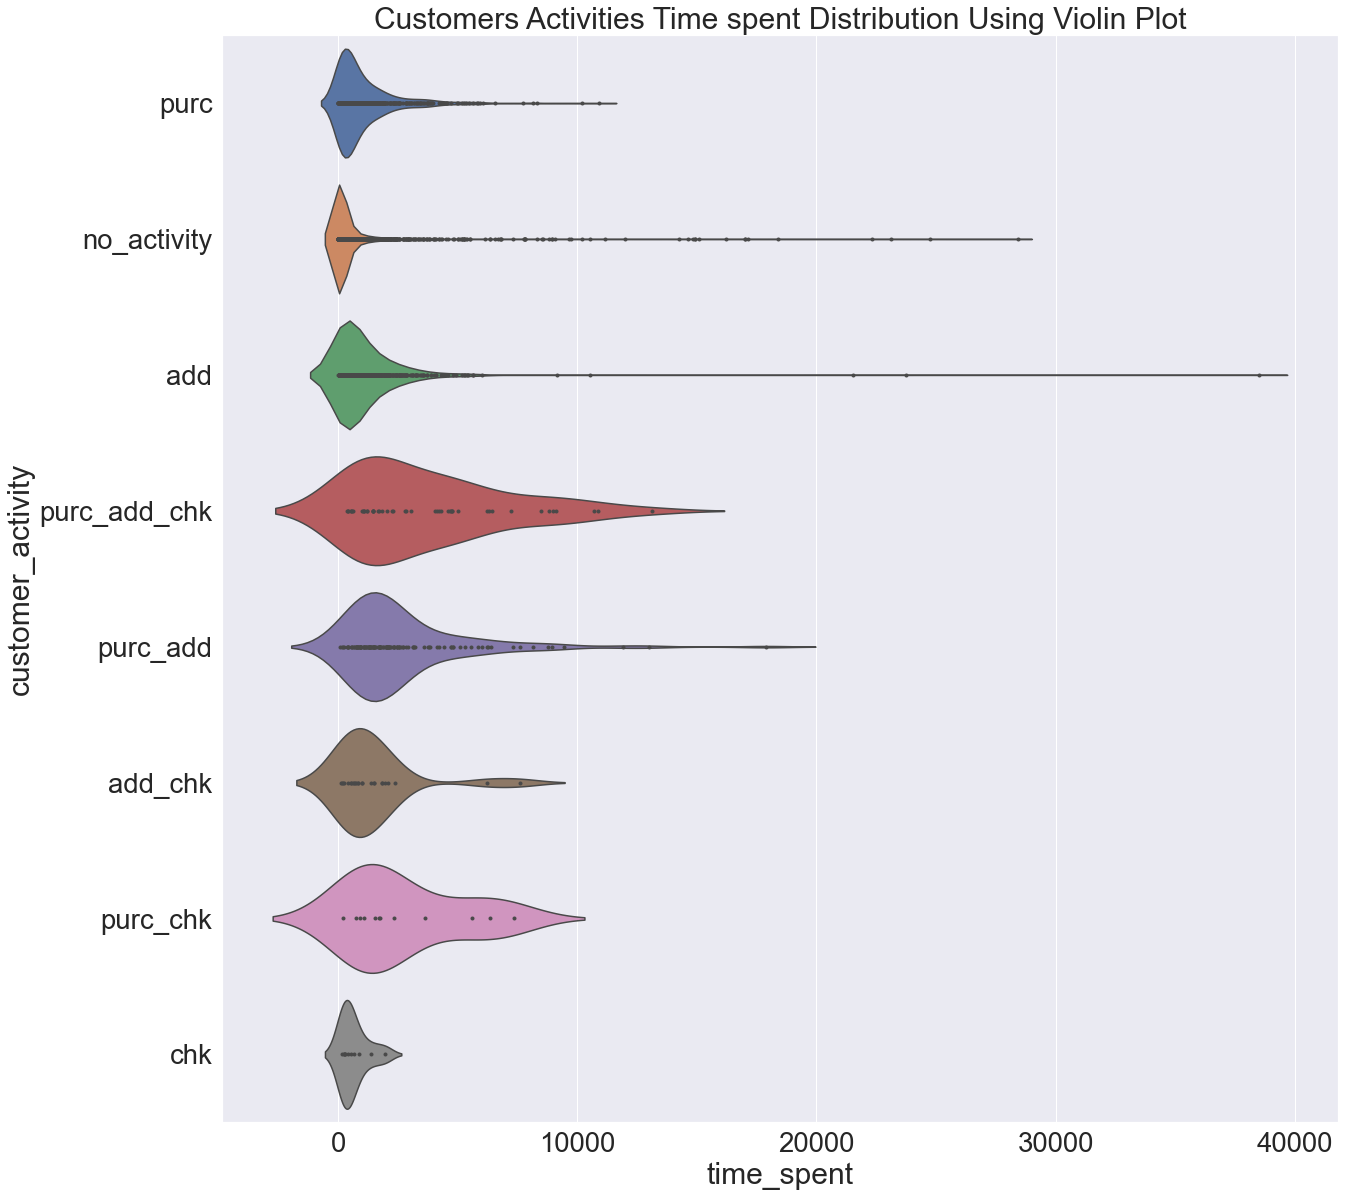

In [40]:
plt.figure(figsize=(20,20))
sns.despine(left=True, bottom=True)
sns.set(font_scale=2.5)
device_timespent = sns.violinplot(
    data=train, inner="point",
    y="customer_activity", x="time_spent",scale="width"
)
plt.title("Customers Activities Time spent Distribution Using Violin Plot")


##### The above plot explains that customers are spending more time only for adding the product to their shopping cart and just visiting the site.

##### Let's see how the customers activity changes over time

In [41]:
cust_activity_my=train.groupby(["year",'month_number','month_label','customer_activity']).agg({'customer_activity':['count']})
cust_activity_my.columns = ['activity_count']
cust_activity_my= cust_activity_my.reset_index()
cust_activity_my=cust_activity_my.sort_values("month_number", ascending=True)
cust_activity_my

,year,month_number,month_label,customer_activity,activity_count
61,2020,1,Jan,purc,77
58,2020,1,Jan,add_chk,3
59,2020,1,Jan,chk,1
60,2020,1,Jan,no_activity,379
63,2020,1,Jan,purc_add_chk,5
...,...,...,...,...,...
51,2019,12,Dec,add_chk,3
52,2019,12,Dec,chk,1
53,2019,12,Dec,no_activity,564
56,2019,12,Dec,purc_add_chk,5


<Figure size 1080x720 with 0 Axes>

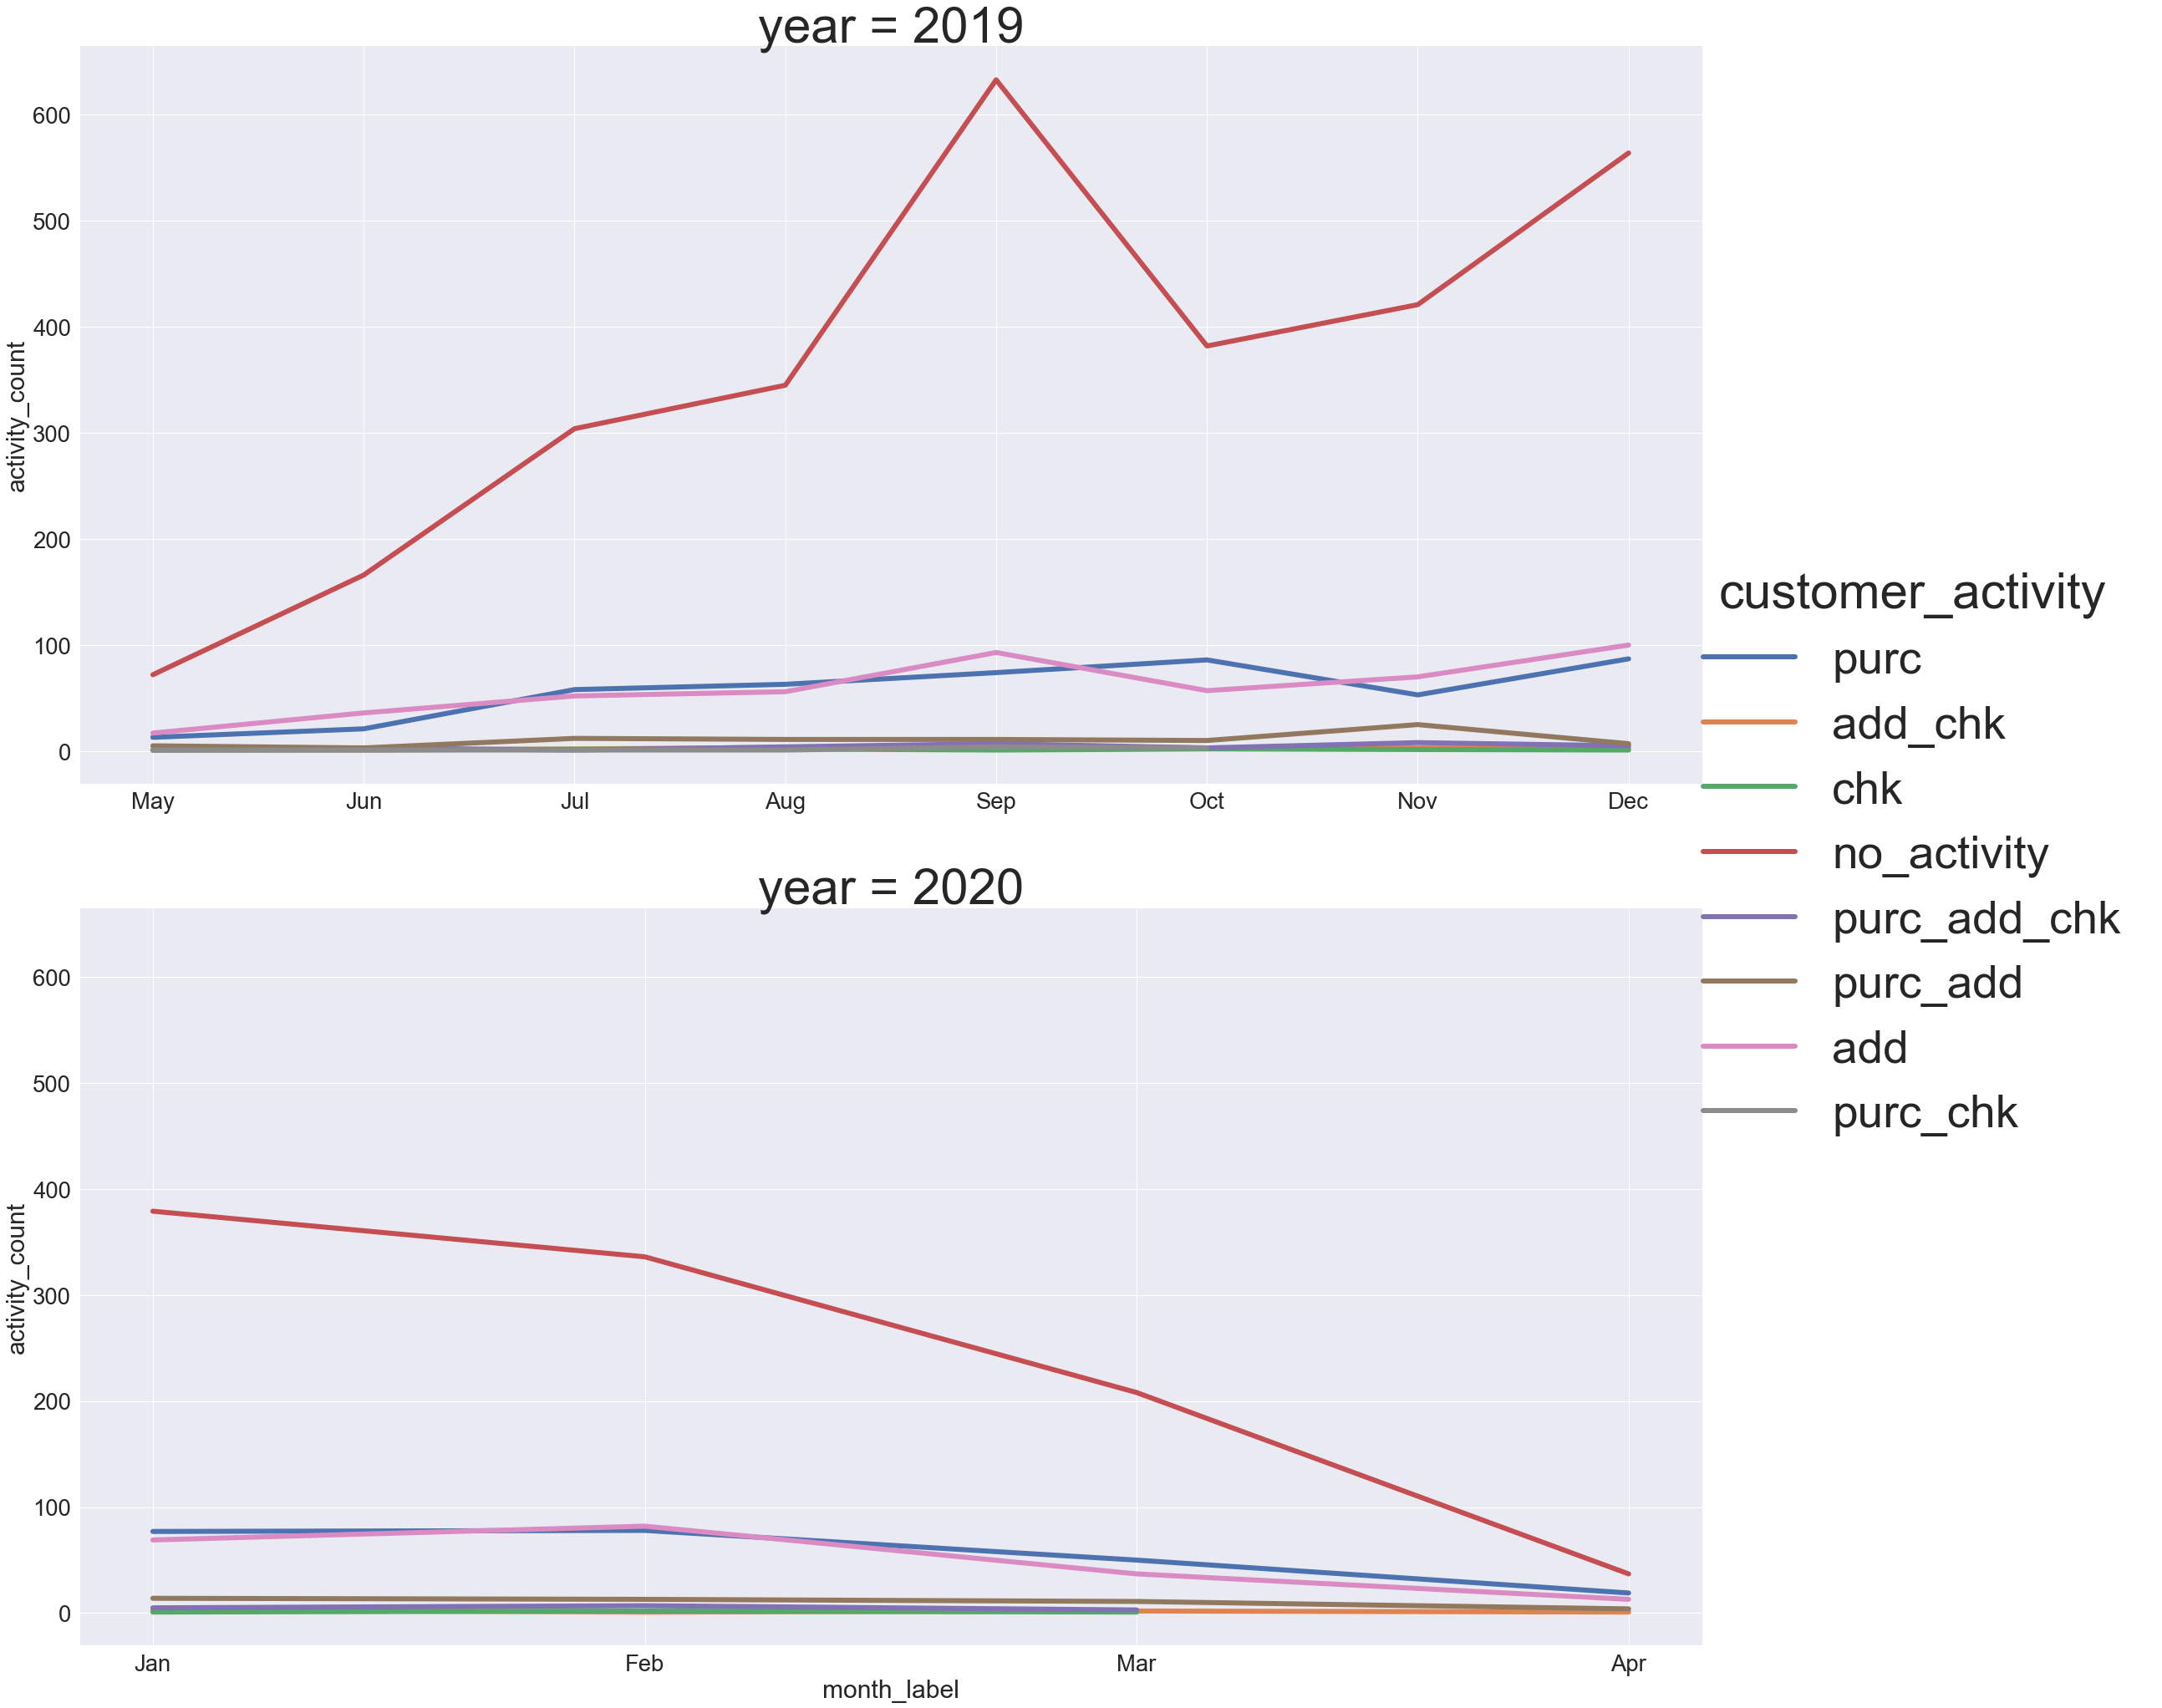

In [42]:
plt.figure(figsize=(15,10))
cust_activity_my_plot = sns.FacetGrid(cust_activity_my,despine=True, row="year", hue="customer_activity",sharey=True, sharex=False, height=15, aspect = 2)
sns.set(font_scale=5)
cust_activity_my_plot.map(sns.lineplot,"month_label","activity_count",linewidth = 6)
cust_activity_my_plot.add_legend()

##### Previously have seen that the highest customer activity in 2019's September. in that most of them are only visiting the website. The same applies to the year 2020's January and February.

##### In 2020 April,  all types of customer activity count decreased under 100.

##### Let's see the customer activity on various device.

In [43]:
cust_activity_device=train.groupby(['device_details','customer_activity']).agg({'customer_activity':['count']})
cust_activity_device.columns = ['activity_count']
cust_activity_device= cust_activity_device.reset_index()
cust_activity_device=cust_activity_device.sort_values("activity_count", ascending=False)
cust_activity_device

,device_details,customer_activity,activity_count
77,iPhone - iOS,no_activity,1091
72,iPhone - Web,no_activity,655
22,Desktop - Chrome,no_activity,465
69,iPhone - MobileWeb,no_activity,256
74,iPhone - iOS,add,233
...,...,...,...
10,Android Phone - Web,purc,1
56,iPad - Web,chk,1
1,Android Phone - Android,add_chk,1
44,Desktop - Safari,chk,1


<Figure size 720x720 with 0 Axes>

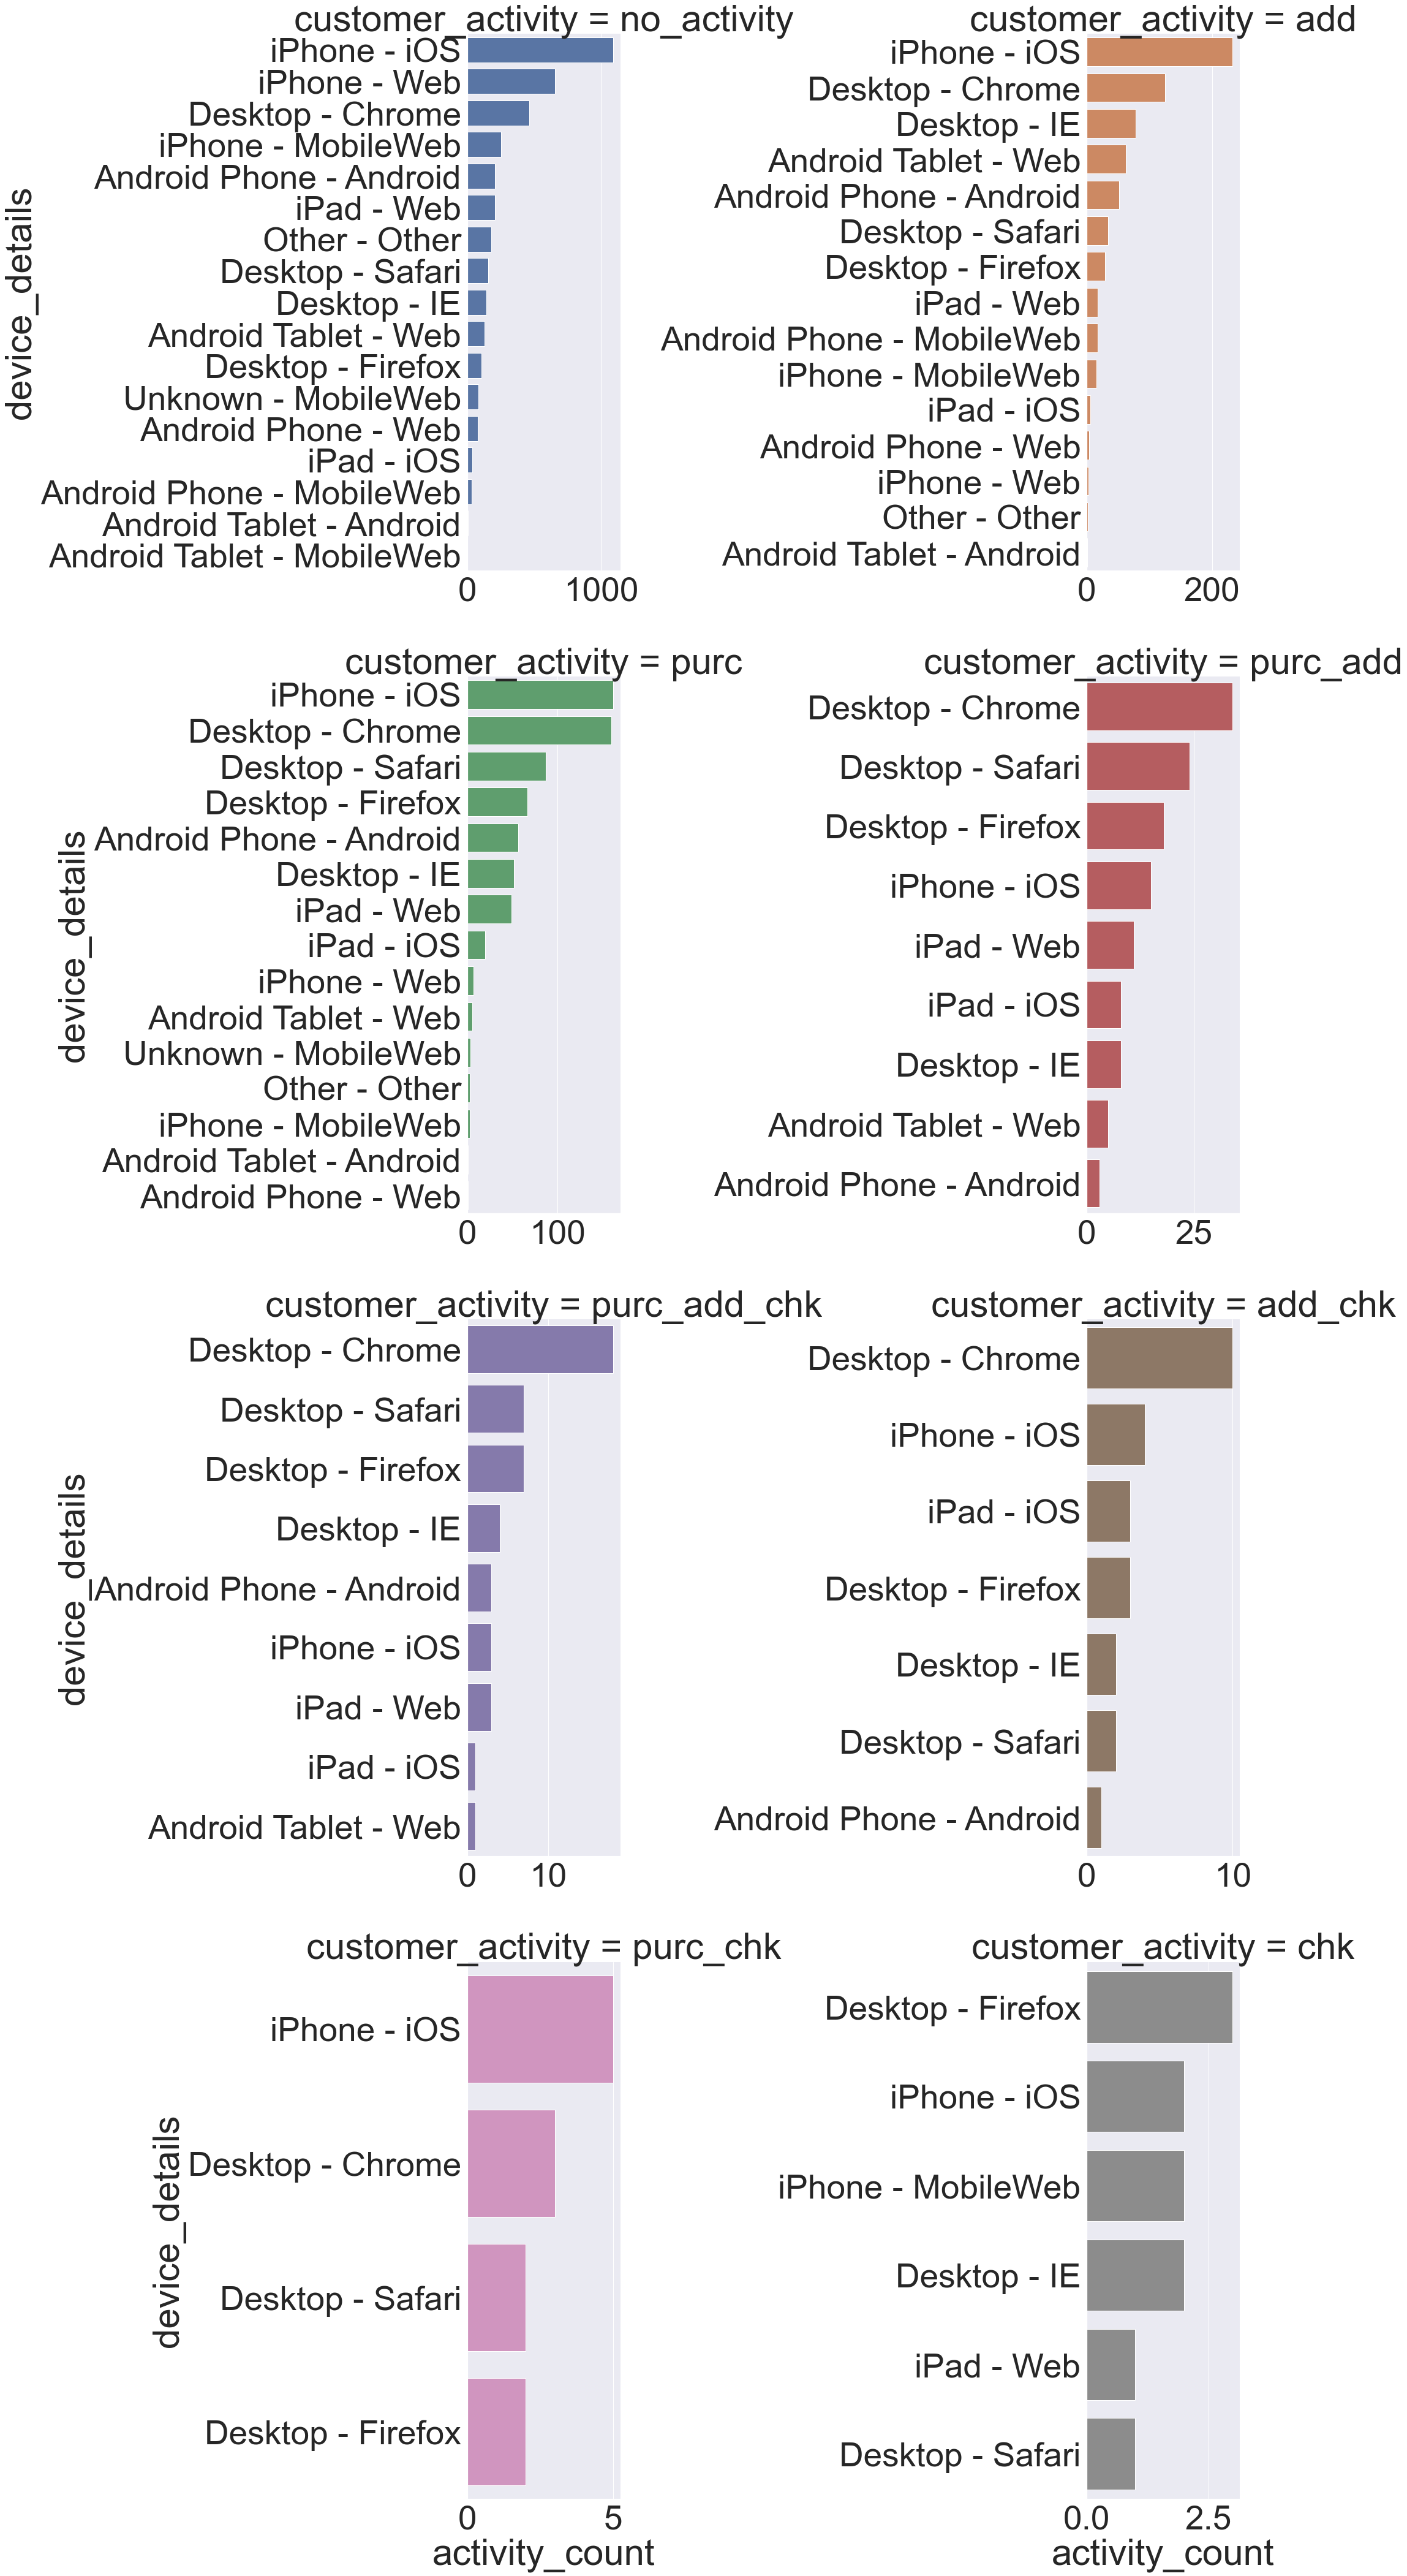

In [44]:
plt.figure(figsize=(10,10))
cust_activity_dev = sns.FacetGrid(cust_activity_device,despine=True, col="customer_activity", hue="customer_activity",
                                  sharey=False, sharex=False, height=15, col_wrap = 2)
sns.set(font_scale=5)
cust_activity_dev.map(sns.barplot,"activity_count","device_details")

##### The above chart explains that the top purchasing customers are iPhone users.